# Telecom Churn Prediction



### Business Problem & Objective

The telecommunications industry experiences a yearly churn of 15-25%. Cost of acquiring a new customer is 5 times the cost of retaining an existing one. Hence, the business problem statement is - Boost profitability by retaining the high value customers of the company.

To achieve this, we need to identify the high value customers who are likely to churn and also the reasons responsible for the churn. 

The dataset contains usage data for 6th, 7th, 8th and 9th month. It is required to identify churn in the 9th month.
Business Objective: 

1. Formulate a model which identify the high value customers who will be a part of the churn in the 9th month.
2. Identify factors which are responsible for the churn which can be used as part of the retention strategy.



#### Broadly, following are the steps performed in this project

1. Importing and Understanding the Data
2. Data Cleaning
	- Deriving the target variable & checking the Class Imbalance
	- Handle Missing Values
3. Identification of High Value Customers
4. EDA - Univariate, Bivariate & Multivariate Analysis
5. Feature Engineering - Deriving new features
6. Outliers Analysis & Treatment
7. Data Preparation
	- Splitting data into Test and Train
	- Feature Scaling
8. Model Building & Evaluation
	- Logistic Regression
	- Decision Tree
	- Decision Tree (with Hyper-parameter tuning)
	- Random Forest
	- Random Forest (with Hyper-parameter tuning - RandomizedSearchCV)
	- Final Model Evaluation Score Card
9. Importance Features
10. Business Insights & Recommendations



## 1. Importing and Understanding the Data

In [1]:
# importing the required pachages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#changing the setting to extend the limit to display rows columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
data = pd.read_csv('telecom_churn_data.csv')

In [4]:
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  \
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00            NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN           NaN           NaN          0.00           NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN   
1     7001865778        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   34.047  355.074  268.321   86.285        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76            0.0           0.00           0.00           0.00            0.0           0.00           0.00           0.00             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76              0.00              0.00              0.00              0.00               0.0              2.91              0.00              0.00         35.39        150.51        299.54         72.11              0.23              4.11              0.00              0.00              0.00              0.46              0.13              0.00              0.00              0.00              0.00               0.0   
2     7001625959        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  167.690  189.058  210.226  290.714        11.54        55.24        37.26        74.81        143.33        220.59        208.36        118.91            0.0           0.00           0.00          38.49            0.0           0.00           0.00          70.94              7.19             28.74             13.58             14.39             29.34             16.86             38.46             28.16             24.11             21.79             15.61             22.24               0.0            135.54             45.76              0.48         60.66         67.41         67.66         64.81              4.34             26.49             22.58              8.76             41.81             67.41             75.53              9.28              1.48             14.76             22.83               0.0   
3     7001204172        109             0.0            

In [5]:
data.shape

(99999, 226)

In [6]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

## 2. Data Cleaning

From the column names, it seems like 3 columns have been named incorrectly. Instead of suffixes '_6-9' they have prefixes 'jun-sep'. Hence, we rename these columns.

In [7]:
#Renaming columns
data.rename(columns = {'jun_vbc_3g' : 'vbc_3g_6','jul_vbc_3g' : 'vbc_3g_7','aug_vbc_3g' : 'vbc_3g_8','sep_vbc_3g' : 'vbc_3g_9'},inplace = True)

In [8]:
#Checking for missing values
data_na = 100*data.isna().sum()/data.shape[0]
data_na.sort_values(ascending = False)

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
night_pck_user_9            74.077741
date_of_last_rech_data_9    74.077741
fb_user_9                   74.077741
arpu_2g_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
total_rech_d

### Deriving the target variable & checking the Class Imbalance

In [9]:
#Checking missing values in columns required to identify churn.
data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].describe()

total_ic_mou_9  total_og_mou_9   vol_2g_mb_9   vol_3g_mb_9
count    99999.000000    99999.000000  99999.000000  99999.000000
mean       189.214260      289.279198     44.719701    136.056613
std        284.823024      468.980002    198.653570    577.394194
min          0.000000        0.000000      0.000000      0.000000
25%         32.370000       25.510000      0.000000      0.000000
50%        105.890000      125.460000      0.000000      0.000000
75%        236.320000      353.480000      0.000000      0.000000
max      10796.590000    11517.730000   8993.950000  39221.270000

There are no missing values in the columns needed to create the target variable. Hence, we create the target variable first and drop all the columns relating to 9th month data.

In [10]:
#Deriving the target variable
data['churn'] = data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis = 1)
data['target'] = pd.cut(data['churn'],[-1,0,40000], labels = [1,0])
data.drop('churn',axis = 1, inplace = True)

In [11]:
#Checking imbalance
data['target'].value_counts(normalize=True)

0    0.898089
1    0.101911
Name: target, dtype: float64

Since the target variable is imbalanced, we will be required to take appropriate measures during model building.

In [12]:
#Dropping all month 9 variables
cols = data.columns
cols9 = list(filter(lambda x:x.endswith("_9") , cols))
data.drop(cols9,axis = 1,inplace = True)

In [13]:
data.shape

(99999, 172)

In [14]:
data_na = 100*data.isna().sum()/data.shape[0]
data_na.sort_values(ascending = False)

max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_2g_6                   74.846748
count_rech_3g_6             74.846748
count_rech_2g_6             74.846748
av_rech_amt_data_6          74.846748
arpu_3g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
date_of_last_rech_data_6    74.846748
total_rech_data_7           74.428744
fb_user_7                   74.428744
max_rech_data_7             74.428744
av_rech_amt_data_7          74.428744
count_rech_2g_7             74.428744
date_of_last_rech_data_7    74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
night_pck_user_7            74.428744
arpu_3g_7                   74.428744
arpu_2g_8                   73.660737
av_rech_amt_data_8          73.660737
arpu_3g_8                   73.660737
count_rech_2g_8             73.660737
night_pck_user_8            73.660737
count_rech_3g_8             73.660737
max_rech_dat

All the columns with high NA values are related to data consumption. Also, all these columns belonging to the same month have the same number of missing values. Hence, we analyze all columns belonging to the same month together.

### Handle Missing Values

In [15]:
#Checking all columns with 70%+ missing values - Data Consumption columns.
cols = data.columns
datanacols = data_na[data_na > 70].index

In [16]:
#Checking missing values of 6 month columns.
colna6 = list(filter(lambda x:x.endswith("_6") , datanacols))
data[data['date_of_last_rech_data_6'].isna() == False][colna6].isna().sum()

date_of_last_rech_data_6    0
total_rech_data_6           0
max_rech_data_6             0
count_rech_2g_6             0
count_rech_3g_6             0
av_rech_amt_data_6          0
arpu_3g_6                   0
arpu_2g_6                   0
night_pck_user_6            0
fb_user_6                   0
dtype: int64

In [17]:
colna7 = list(filter(lambda x:x.endswith("_7") , datanacols))
data[data['date_of_last_rech_data_7'].isna() == False][colna7].isna().sum()

date_of_last_rech_data_7    0
total_rech_data_7           0
max_rech_data_7             0
count_rech_2g_7             0
count_rech_3g_7             0
av_rech_amt_data_7          0
arpu_3g_7                   0
arpu_2g_7                   0
night_pck_user_7            0
fb_user_7                   0
dtype: int64

In [18]:
colna8 = list(filter(lambda x:x.endswith("_8") , datanacols))
data[data['date_of_last_rech_data_8'].isna() == False][colna8].isna().sum()

date_of_last_rech_data_8    0
total_rech_data_8           0
max_rech_data_8             0
count_rech_2g_8             0
count_rech_3g_8             0
av_rech_amt_data_8          0
arpu_3g_8                   0
arpu_2g_8                   0
night_pck_user_8            0
fb_user_8                   0
dtype: int64

It can be seen that for all the rows where date of last recharge is not available for the particular month, the data consumption values are missing.
These can be imputed as zero since there has been no recharge.
Further, the categorical variables fb_user and night_pck_user are dropped along with the date_of_last_reach, since their value cannot be determined.

In [19]:
#Dropping columns where missing values cannot be imputed
dropcols = ['fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

In [20]:
data.drop(dropcols,axis = 1,inplace = True)

In [21]:
data_na = 100*data.isna().sum()/data.shape[0]
data_na.sort_values(ascending = False)

av_rech_amt_data_6      74.846748
total_rech_data_6       74.846748
count_rech_2g_6         74.846748
max_rech_data_6         74.846748
arpu_3g_6               74.846748
arpu_2g_6               74.846748
count_rech_3g_6         74.846748
av_rech_amt_data_7      74.428744
count_rech_2g_7         74.428744
max_rech_data_7         74.428744
arpu_3g_7               74.428744
arpu_2g_7               74.428744
total_rech_data_7       74.428744
count_rech_3g_7         74.428744
arpu_2g_8               73.660737
count_rech_3g_8         73.660737
count_rech_2g_8         73.660737
av_rech_amt_data_8      73.660737
arpu_3g_8               73.660737
total_rech_data_8       73.660737
max_rech_data_8         73.660737
std_og_t2t_mou_8         5.378054
spl_ic_mou_8             5.378054
ic_others_8              5.378054
loc_og_t2f_mou_8         5.378054
roam_og_mou_8            5.378054
std_ic_t2o_mou_8         5.378054
loc_og_t2m_mou_8         5.378054
og_others_8              5.378054
loc_og_t2t_mou

In [22]:
datanacols = data_na[data_na > 70].index
datanacols

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'], dtype='object')

In [23]:
#Replace missing values with 0
for i in datanacols :
    data[i].fillna(0,inplace = True)

In [24]:
data.shape

(99999, 163)

In [25]:
data_na = 100*data.isna().sum()/data.shape[0]
data_na.sort_values(ascending = False)

std_og_t2f_mou_8        5.378054
std_og_t2m_mou_8        5.378054
std_ic_t2t_mou_8        5.378054
loc_og_t2m_mou_8        5.378054
loc_og_t2f_mou_8        5.378054
spl_og_mou_8            5.378054
loc_og_t2c_mou_8        5.378054
std_ic_t2m_mou_8        5.378054
loc_og_mou_8            5.378054
std_og_t2t_mou_8        5.378054
std_ic_t2f_mou_8        5.378054
roam_og_mou_8           5.378054
std_ic_t2o_mou_8        5.378054
og_others_8             5.378054
std_og_t2c_mou_8        5.378054
std_og_mou_8            5.378054
std_ic_mou_8            5.378054
ic_others_8             5.378054
isd_ic_mou_8            5.378054
spl_ic_mou_8            5.378054
loc_og_t2t_mou_8        5.378054
isd_og_mou_8            5.378054
loc_ic_t2f_mou_8        5.378054
loc_ic_mou_8            5.378054
loc_ic_t2m_mou_8        5.378054
onnet_mou_8             5.378054
loc_ic_t2t_mou_8        5.378054
offnet_mou_8            5.378054
roam_ic_mou_8           5.378054
spl_og_mou_6            3.937039
loc_ic_t2t

In [26]:
len(data_na[data_na > 0])

95

Similar to the previous exercise, we convert all rows relating to talktime usage as zero, where the date of last recharge for the particular months is missing.

In [27]:
col_mon_8 = data_na[data_na > 5].index

In [28]:
len(col_mon_8)

29

In [29]:
for i in col_mon_8 :
    data.loc[(data['date_of_last_rech_8'].isna()) & (data[i].isna()),i] = 0

In [30]:
data_na = 100*data.isna().sum()/data.shape[0]
data_na.sort_values(ascending = False)

std_og_t2f_mou_6        3.937039
loc_og_t2c_mou_6        3.937039
isd_ic_mou_6            3.937039
loc_og_t2f_mou_6        3.937039
spl_ic_mou_6            3.937039
loc_og_t2m_mou_6        3.937039
spl_og_mou_6            3.937039
loc_og_mou_6            3.937039
loc_og_t2t_mou_6        3.937039
std_ic_mou_6            3.937039
roam_og_mou_6           3.937039
isd_og_mou_6            3.937039
std_ic_t2o_mou_6        3.937039
roam_ic_mou_6           3.937039
std_og_t2t_mou_6        3.937039
std_ic_t2f_mou_6        3.937039
offnet_mou_6            3.937039
std_ic_t2m_mou_6        3.937039
og_others_6             3.937039
loc_ic_t2t_mou_6        3.937039
std_og_t2c_mou_6        3.937039
loc_ic_t2m_mou_6        3.937039
loc_ic_t2f_mou_6        3.937039
std_og_t2m_mou_6        3.937039
loc_ic_mou_6            3.937039
std_og_mou_6            3.937039
std_ic_t2t_mou_6        3.937039
onnet_mou_6             3.937039
ic_others_6             3.937039
isd_og_mou_7            3.859039
std_og_t2c

In [31]:
col_mon_6 = data_na[data_na > 3.9].index
for i in col_mon_6 :
    data.loc[(data['date_of_last_rech_6'].isna()) & (data[i].isna()),i] = 0

In [32]:
data_na = 100*data.isna().sum()/data.shape[0]
data_na.sort_values(ascending = False)

std_ic_t2m_mou_7        3.859039
loc_og_t2t_mou_7        3.859039
loc_og_t2f_mou_7        3.859039
loc_og_t2c_mou_7        3.859039
loc_og_mou_7            3.859039
std_og_t2t_mou_7        3.859039
std_og_t2m_mou_7        3.859039
std_og_t2f_mou_7        3.859039
std_og_t2c_mou_7        3.859039
std_og_mou_7            3.859039
isd_og_mou_7            3.859039
ic_others_7             3.859039
isd_ic_mou_7            3.859039
spl_ic_mou_7            3.859039
spl_og_mou_7            3.859039
std_ic_mou_7            3.859039
std_ic_t2o_mou_7        3.859039
std_ic_t2f_mou_7        3.859039
std_ic_t2t_mou_7        3.859039
loc_ic_mou_7            3.859039
loc_ic_t2f_mou_7        3.859039
loc_ic_t2m_mou_7        3.859039
loc_ic_t2t_mou_7        3.859039
loc_og_t2m_mou_7        3.859039
og_others_7             3.859039
offnet_mou_7            3.859039
roam_og_mou_7           3.859039
onnet_mou_7             3.859039
roam_ic_mou_7           3.859039
date_of_last_rech_8     3.622036
isd_og_mou

In [33]:
col_mon_7 = data_na[data_na > 3.8].index
for i in col_mon_7 :
    data.loc[(data['date_of_last_rech_7'].isna()) & (data[i].isna()),i] = 0

In [34]:
data_na = 100*data.isna().sum()/data.shape[0]
data_na.sort_values(ascending = False)

date_of_last_rech_8     3.622036
std_og_t2f_mou_8        3.397034
std_og_t2m_mou_8        3.397034
std_ic_t2t_mou_8        3.397034
loc_og_t2m_mou_8        3.397034
loc_og_t2f_mou_8        3.397034
isd_og_mou_8            3.397034
loc_og_t2c_mou_8        3.397034
std_ic_t2m_mou_8        3.397034
loc_og_mou_8            3.397034
std_og_t2t_mou_8        3.397034
std_ic_t2f_mou_8        3.397034
roam_og_mou_8           3.397034
og_others_8             3.397034
std_ic_t2o_mou_8        3.397034
std_og_t2c_mou_8        3.397034
std_og_mou_8            3.397034
ic_others_8             3.397034
std_ic_mou_8            3.397034
isd_ic_mou_8            3.397034
spl_ic_mou_8            3.397034
loc_og_t2t_mou_8        3.397034
spl_og_mou_8            3.397034
loc_ic_t2f_mou_8        3.397034
roam_ic_mou_8           3.397034
loc_ic_mou_8            3.397034
loc_ic_t2m_mou_8        3.397034
onnet_mou_8             3.397034
loc_ic_t2t_mou_8        3.397034
offnet_mou_8            3.397034
std_ic_mou

In [35]:
#Dropping all the date related columns
datecols = ['date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6','last_date_of_month_8','last_date_of_month_7','last_date_of_month_6']
data.drop(datecols,axis = 1,inplace = True)
data_na = 100*data.isna().sum()/data.shape[0]
data_na.sort_values(ascending = False)

roam_og_mou_8         3.397034
std_og_t2c_mou_8      3.397034
std_ic_t2m_mou_8      3.397034
loc_ic_mou_8          3.397034
loc_og_t2t_mou_8      3.397034
std_og_mou_8          3.397034
loc_og_t2m_mou_8      3.397034
std_ic_t2f_mou_8      3.397034
loc_og_t2f_mou_8      3.397034
roam_ic_mou_8         3.397034
std_ic_t2t_mou_8      3.397034
loc_og_t2c_mou_8      3.397034
std_og_t2f_mou_8      3.397034
loc_og_mou_8          3.397034
og_others_8           3.397034
std_og_t2t_mou_8      3.397034
isd_og_mou_8          3.397034
std_og_t2m_mou_8      3.397034
std_ic_mou_8          3.397034
ic_others_8           3.397034
spl_og_mou_8          3.397034
offnet_mou_8          3.397034
loc_ic_t2f_mou_8      3.397034
onnet_mou_8           3.397034
loc_ic_t2t_mou_8      3.397034
isd_ic_mou_8          3.397034
std_ic_t2o_mou_8      3.397034
loc_ic_t2m_mou_8      3.397034
spl_ic_mou_8          3.397034
spl_og_mou_6          3.163032
spl_ic_mou_6          3.163032
std_og_t2f_mou_6      3.163032
std_ic_t

In [36]:
#Checking all remaining columns with missing values.
nacols = data_na[data_na > 0.1].index
len(nacols)

90

In [37]:
data[nacols].describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7   og_others_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  \
count         98981.0         98981.0         98981.0  96836.000000  97089.000000  96602.000000  96836.000000  97089.000000  96602.000000   96836.000000   97089.000000   96602.000000   96836.000000   97089.000000   96602.000000      96836.000000      97089.000000      96602.000000      96836.000000      97089.000000      96602.000000      96836.000000      97089.000000      96602.000000      96836.000000      97089.000000      96602.000000   96836.00000  97089.000000  96602.000000      96836.000000      97089.000000      96602.000000      96836.000000      97089.000000      96602.000000      96836.000000      97089.000000      96602.000000           96836.0           97089.0           96602.0  96836.000000  97089.000000  96602.000000  96836.000000  97089.000000  96602.000000  96836.000000  97089.000000  96602.000000  96836.000000  97089.000000  96602.000000      96836.000000      97089.000000      96602.000000      96836.000000      97089.000000      96602.000000      96836.000000   
mean              0.0             0.0             0.0    131.337648    132.364235    130.290319    196.353499    195.119108    192.543678       9.870484       7.080012       7.143425      13.800146       9.722759       9.767399         46.724291         46.018758         44.946793         92.596015         90.503767         89.873522          3.721032          3.755911          3.602567          1.114080          1.355124          1.404417     143.04859    140.285713    138.430017         79.191799         82.485383         81.574810         86.601847         89.916569         87.996090          1.119987          1.104111          1.045895               0.0               0.0               0.0    166.916324    173.508727    170.619384      0.791897      0.768981      0.775021      3.885504      4.929618      4.950132      0.450527      0.029940      0.032688         47.539327         47.521435         46.243207        106.616608        106.073440        106.236335         11.987716   
std               0.0             0.0             0.0    296.251904    307.562549    306.347960    316.074580    324.845255    324.994971      72.539192      73.091488      67.705357      71.167883      58.177389      64.061837        150.310813        154.625360        149.767895        162.341602        156.978445        155.468500         14.177387         14.200001         13.144557          5.428047          7.497746          6.716496     251.07191    247.904595    244.202601        251.565941        262.467403        263.014809        254.712877        268.177128        269.258088          7.953629          8.557978          7.825950               0.0               0.0               0.0    388.675839    407.284475    408.137841     25.662170     25.477729     25.281443     14.880724     20.566175     17.685594      4.109588      2.151128      2.299522        139.761979        145.157564        135.989786        171.293828        168.922627        168.676367         39.994629   
min        

Some of the columns have only 0 values. Drop Variables with all zeros.

In [38]:
dropcols = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']
data.drop(dropcols,axis =1,inplace = True)

In [39]:
data_na = 100*data.isna().sum()/data.shape[0]
nacols = data_na[data_na > 0.1].index
len(nacols)

81

There is no logical imputation for the remaining missing values. Hence, we now look at finding an appropriate measure to replace the missing values.

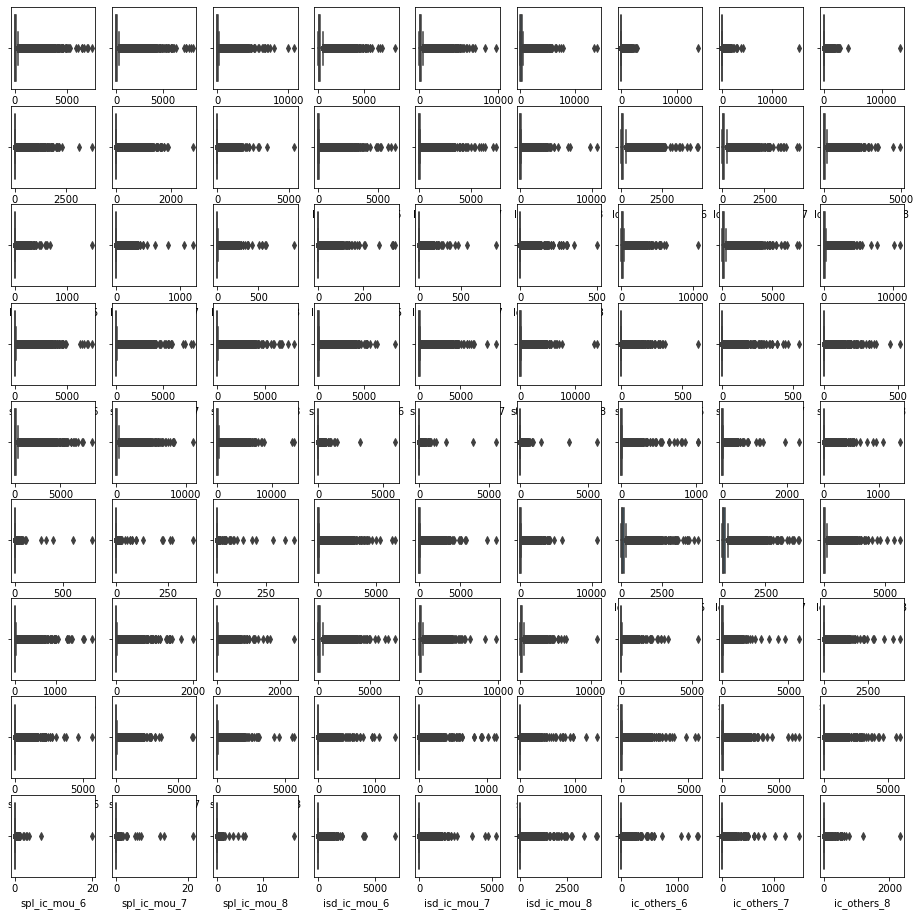

In [40]:
j = 1
plt.figure(figsize=(16,16))
for i in nacols:
    plt.subplot(9,9,j)
    j = j + 1
    sns.boxplot(data[i])
plt.show()

Since all remaining columns have mode as 0 and mean is skewed due to high number of outliers, we select median as measure of imputation.

In [41]:
#Replace missing values with median
for i in nacols:
    data[i].fillna(data[i].median(),inplace = True)

In [42]:
data_na = 100*data.isna().sum()/data.shape[0]
data_na.sort_values(ascending = False)

target                0.0
total_og_mou_7        0.0
og_others_8           0.0
og_others_7           0.0
og_others_6           0.0
spl_og_mou_8          0.0
spl_og_mou_7          0.0
spl_og_mou_6          0.0
isd_og_mou_8          0.0
isd_og_mou_7          0.0
isd_og_mou_6          0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
std_og_t2f_mou_8      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_mou_6      0.0
total_og_mou_6        0.0
total_og_mou_8        0.0
vbc_3g_6              0.0
loc_ic_t2t_mou_6      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2t_mou_7      0.0
std_ic_t2t_mou_6      0.0
loc_ic_mou_8          0.0
loc_ic_mou_7          0.0
loc_ic_mou_6          0.0
loc_ic_t2f_mou_8      0.0
loc_ic_t2f_mou_7      0.0
loc_ic_t2f_mou_6      0.0
loc_ic_t2m_mou_8      0.0
loc_ic_t2m_mou_7      0.0
loc_ic_t2m_mou_6      0.0
loc_ic_t2t_mou_8      0.0
loc_ic_t2t_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_m

#### All Missing Values have been dealt with. Data is clean

## 3. Identification of High Value Customers

In [43]:
#Creating column based on reacharge of 6 and 7 month.
data['total_rech'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2

In [44]:
hvc_mark = np.percentile(data['total_rech'],70)
hvc_mark

368.5

In [45]:
#Selecting only high value customers.
datafinal = data[data['total_rech'] >= hvc_mark]

In [46]:
datafinal.shape

(30011, 149)

In [47]:
datafinal.describe()

mobile_number  circle_id        arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7   og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  \
count   3.001100e+04    30011.0  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   30011.000000   30011.000000    30011.00000   30011.000000   30011.000000   30011.000000      30011.000000      30011.000000      30011.000000      30011.000000      30011.000000      30011.000000       30011.00000      30011.000000      30011.000000      30011.000000      30011.000000      30011.000000  30011.000000  30011.000000  30011.000000      30011.000000      30011.000000      30011.000000      30011.000000      30011.000000      30011.000000      30011.000000      30011.000000      30011.000000  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000    30011.000000    30011.000000    30011.000000      30011.000000      30011.000000      30011.000000      30011.000000       30011.00000      30011.000000   
mean    7.001223e+09      109.0    587.284404    589.135427    534.857433    296.354949    304.621619    268.274395    418.838230    424.719790    376.965368      17.412764      13.522114       13.25627      29.321648      22.036003      21.469272         94.791623         95.829421         87.382927        181.664494        181.621461        168.440147           6.97933          7.097268          6.494314          1.567160          1.862229          1.712739    283.559372    284.658843    262.574889        189.753131        199.877508        172.196408        203.133313        213.441583        179.630291          2.010766          2.034241          1.789728    394.971680    415.420351    353.759443      2.264425      2.207400      2.029314      5.916364      7.425487      6.885193      0.692507      0.047600      0.059131      686.697541      709.124730      623.774684         68.895719         70.446717         66.271109        160.144431         161.30787        154.860280   
std     6.846405e+05        0.0    442.722413    462.897814    492.259586    460.581225    481.613608    466.195939    469.874822    485.904832    476.137321      79.152657      76.303736       74.55207     118.570414      97.925249     106.244774        236.807616        248.096406        234.637339        249.883757        240.487047        234.324494          22.66552         22.588864         20.220028          6.889317          9.255645          7.397562    379.581132    375.465697    365.691884        409.716719        428.119476        410.033964        413.471938        437.927558        416.726536         12.457422         13.350441         11.700376    606.440825    637.387277    616.106028     45.918087     45.619381     44.794926     18.621373     23.065743     22.893414      2.281325      2.741786      3.320320      660.356820      685.071178      685.983313        158.590638        167.265206        155.576771        221.685204         219.13177        216.309133   
min     7.000000e+09      1

In [48]:
datafinal.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 149 columns):
mobile_number         30011 non-null int64
circle_id             30011 non-null int64
arpu_6                30011 non-null float64
arpu_7                30011 non-null float64
arpu_8                30011 non-null float64
onnet_mou_6           30011 non-null float64
onnet_mou_7           30011 non-null float64
onnet_mou_8           30011 non-null float64
offnet_mou_6          30011 non-null float64
offnet_mou_7          30011 non-null float64
offnet_mou_8          30011 non-null float64
roam_ic_mou_6         30011 non-null float64
roam_ic_mou_7         30011 non-null float64
roam_ic_mou_8         30011 non-null float64
roam_og_mou_6         30011 non-null float64
roam_og_mou_7         30011 non-null float64
roam_og_mou_8         30011 non-null float64
loc_og_t2t_mou_6      30011 non-null float64
loc_og_t2t_mou_7      30011 non-null float64
loc_og_t2t_mou_8      30011 non-null fl

In [49]:
datafinal.target.value_counts(normalize=True)

0    0.913598
1    0.086402
Name: target, dtype: float64

The imbalance in the target variable has increased.

In [50]:
num_cols = datafinal.columns.drop(['mobile_number', 'circle_id', 'target'])
num_cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'total_rech'], dtype='object', length=146)

## 4. EDA - Univariate, Bivariate & Multivariate Analysis

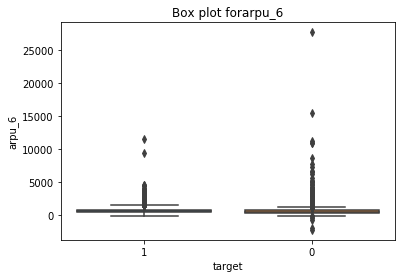

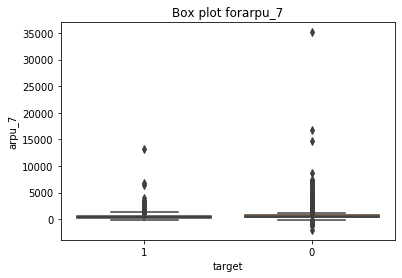

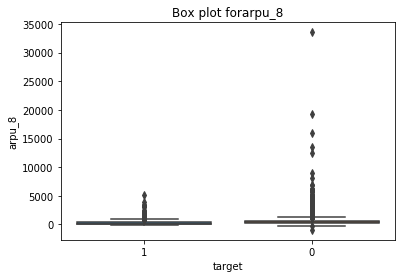

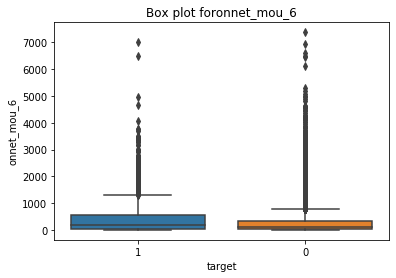

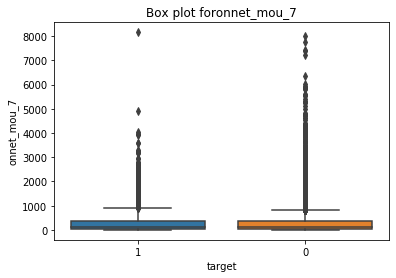

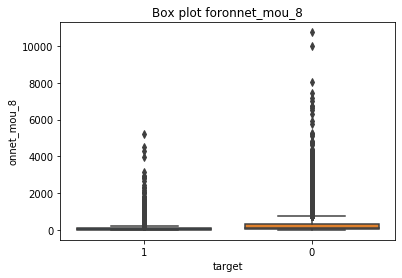

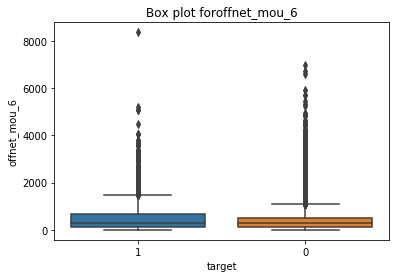

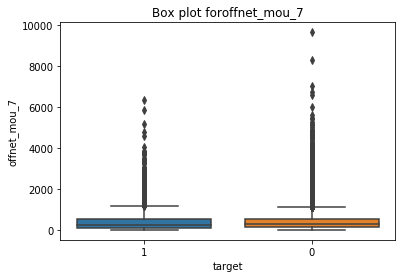

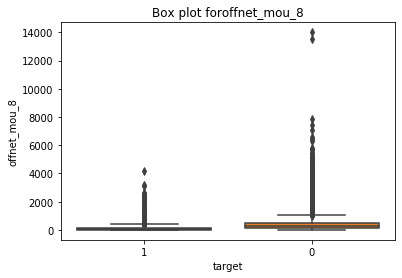

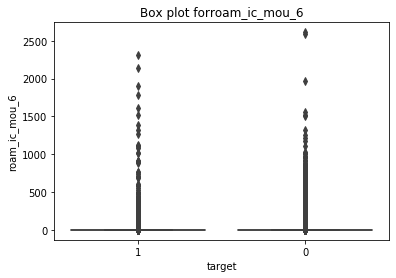

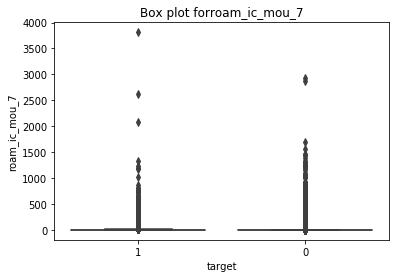

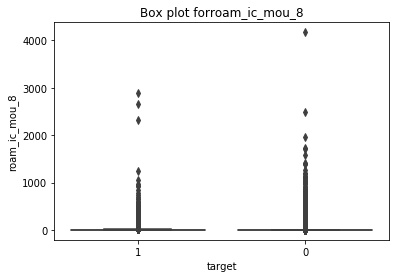

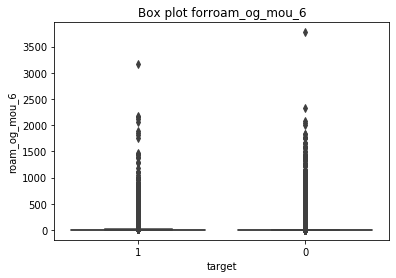

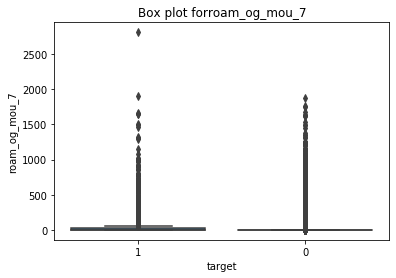

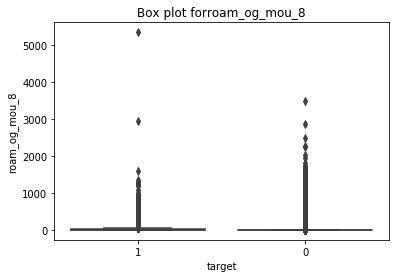

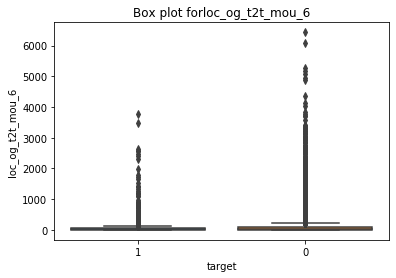

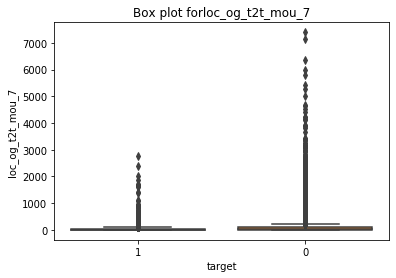

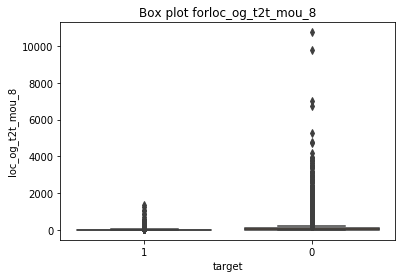

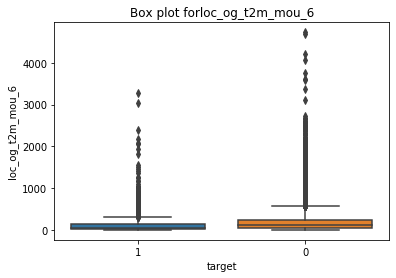

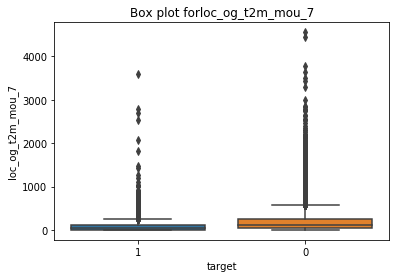

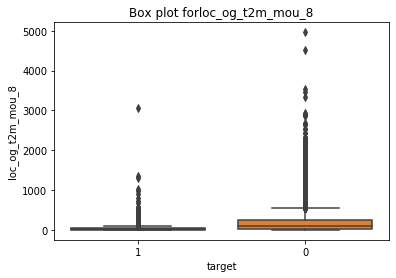

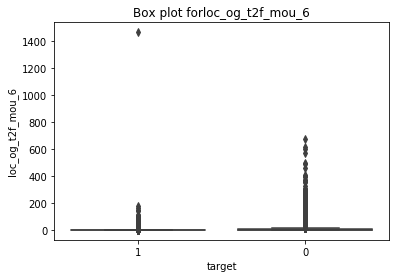

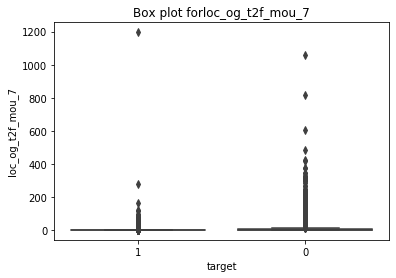

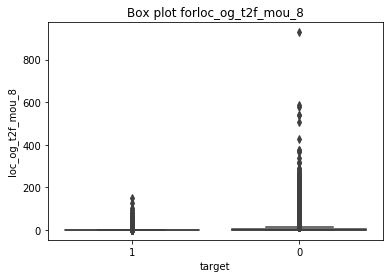

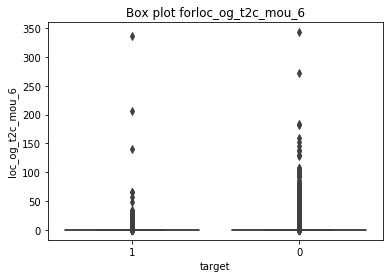

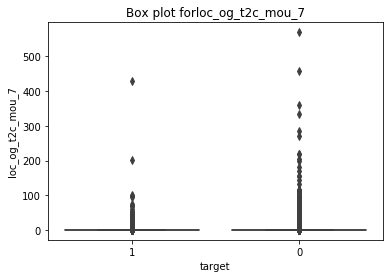

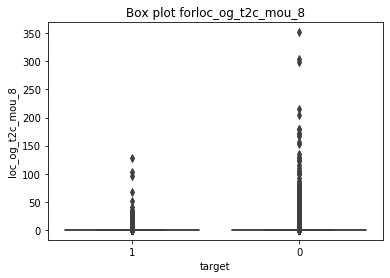

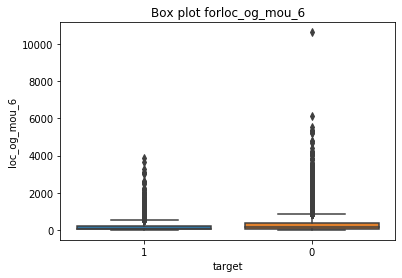

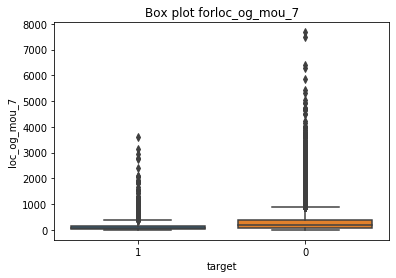

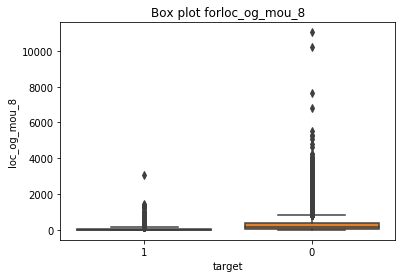

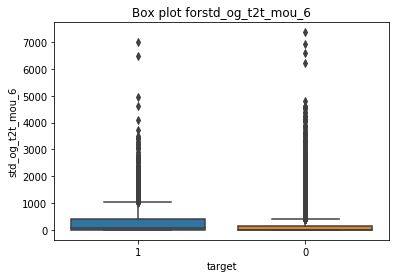

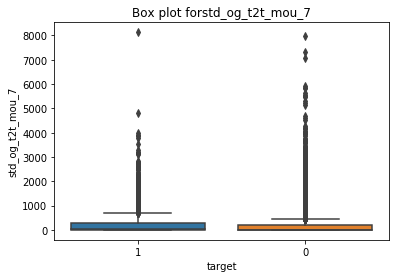

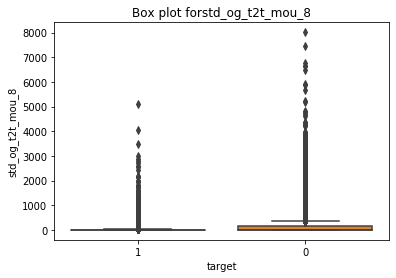

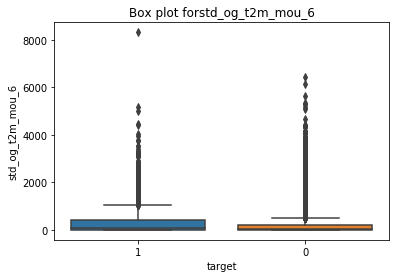

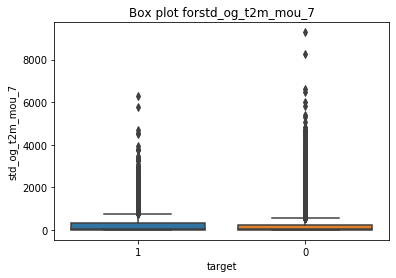

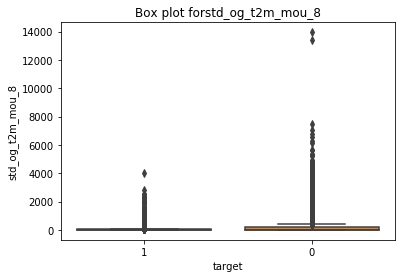

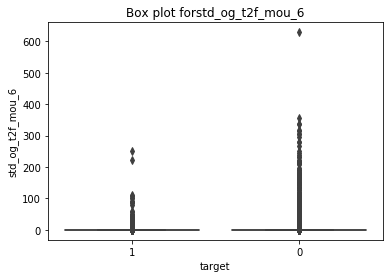

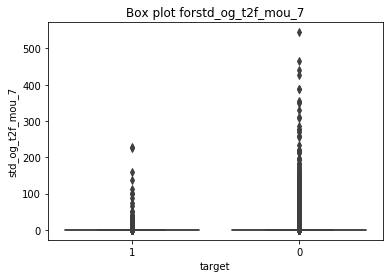

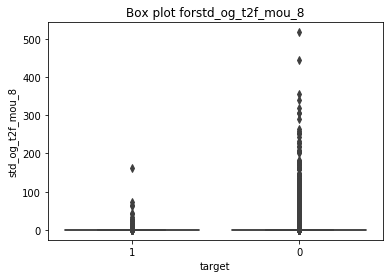

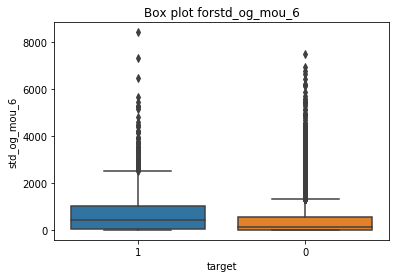

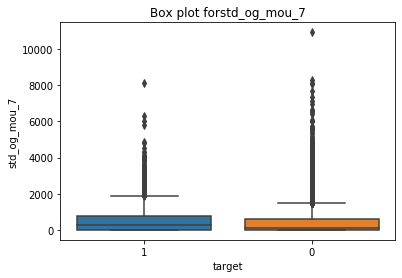

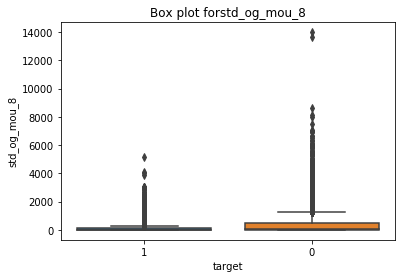

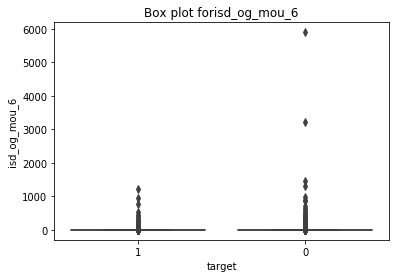

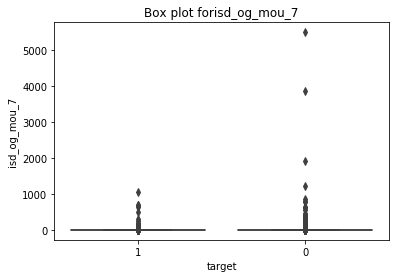

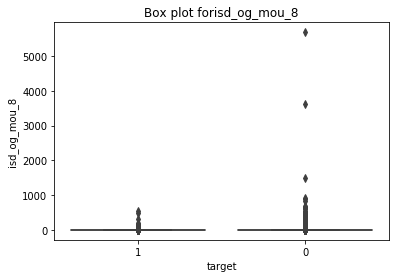

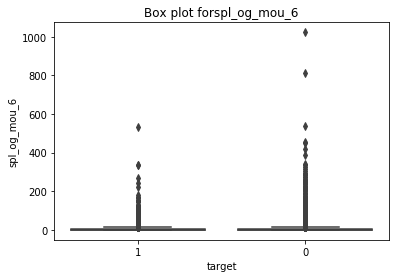

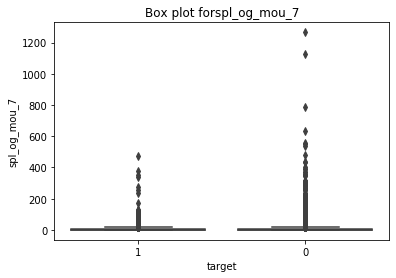

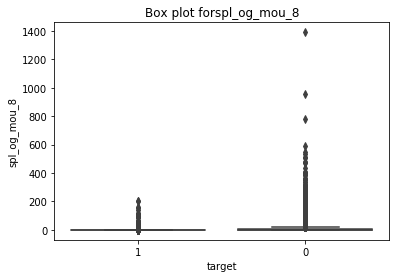

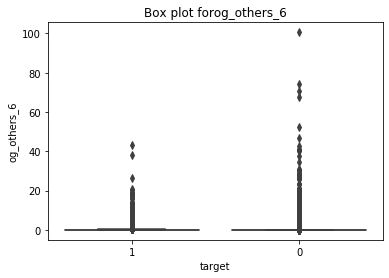

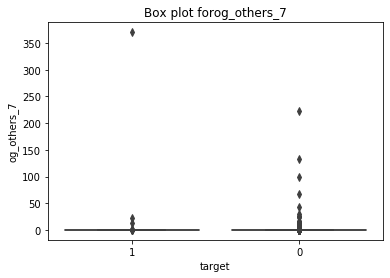

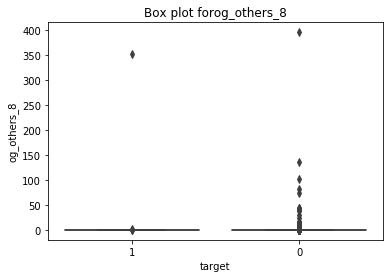

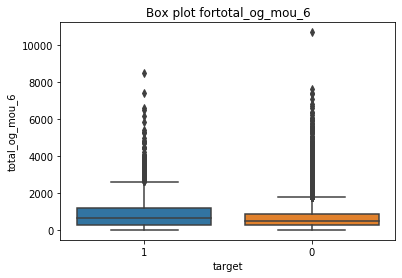

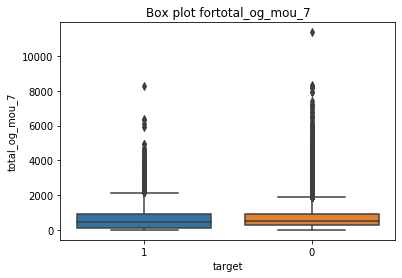

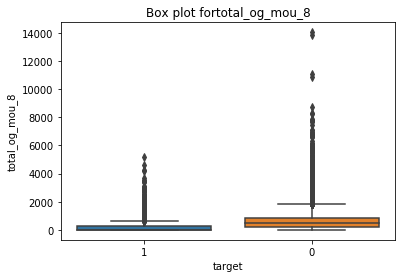

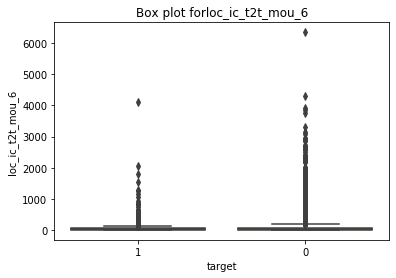

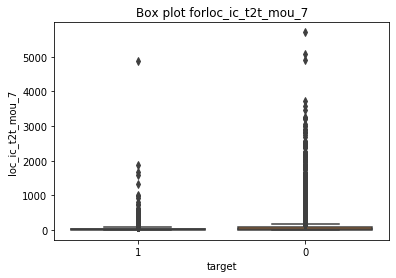

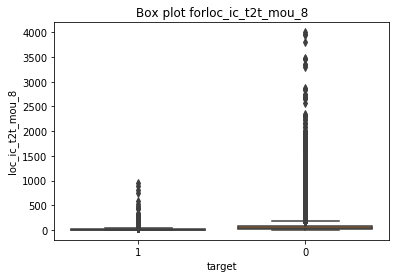

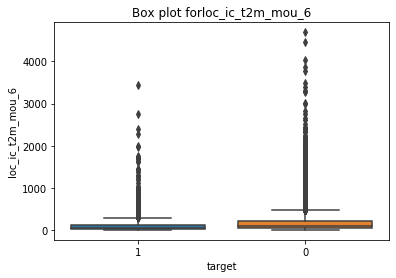

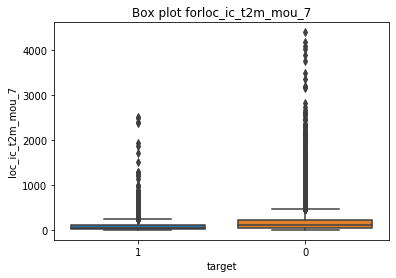

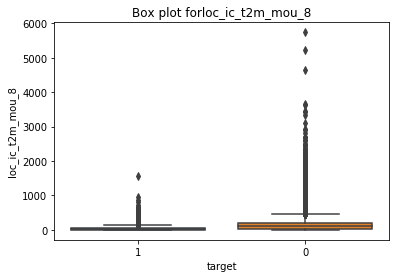

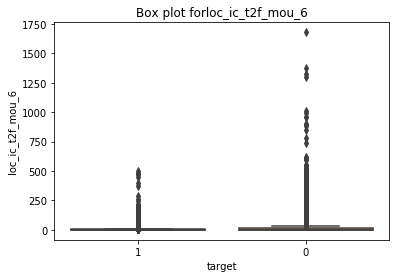

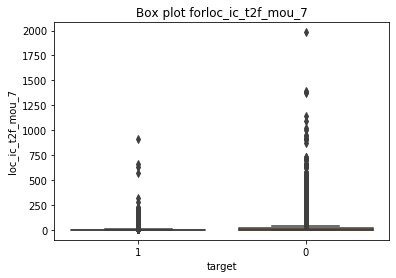

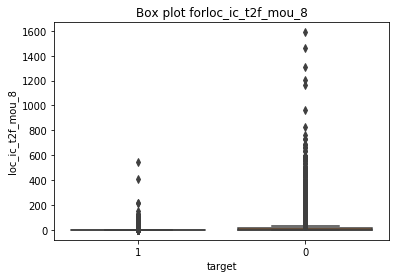

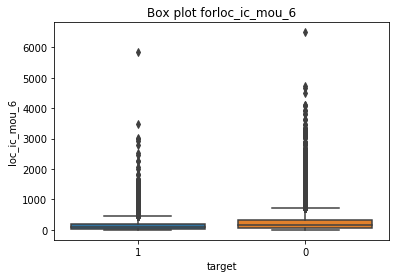

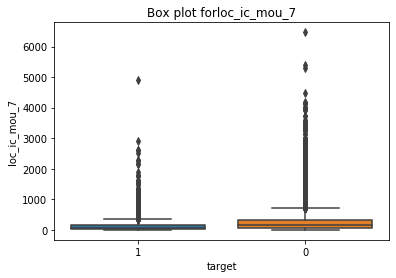

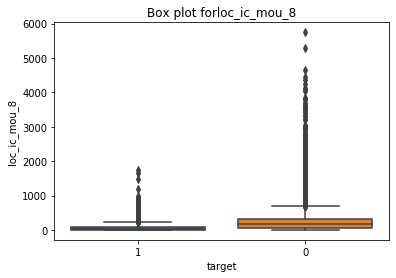

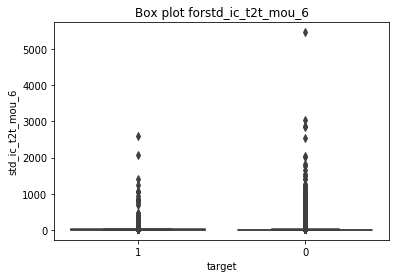

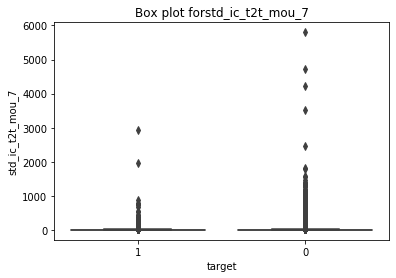

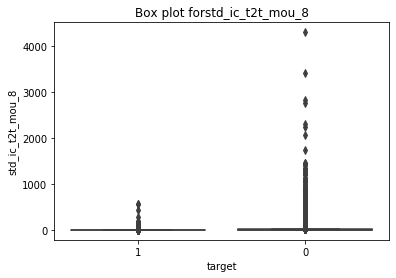

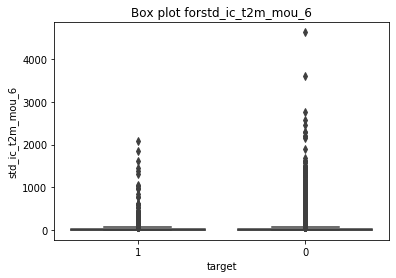

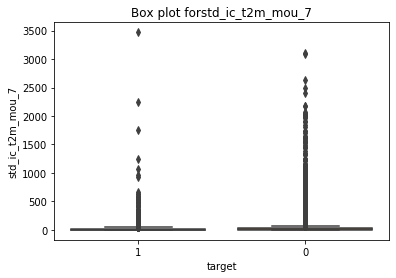

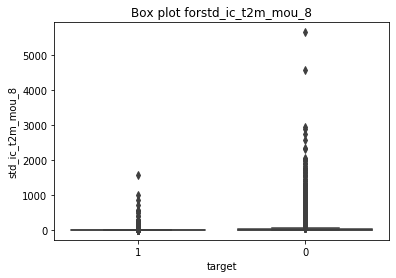

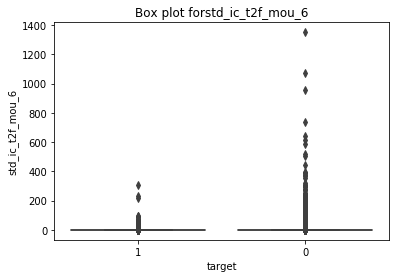

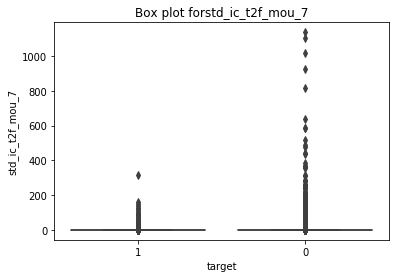

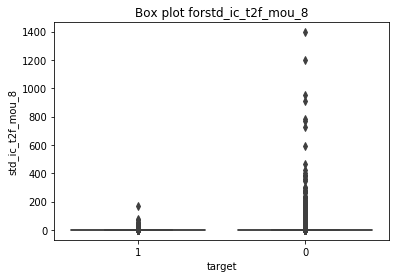

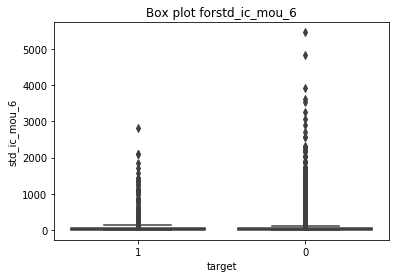

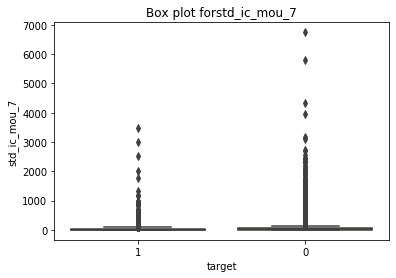

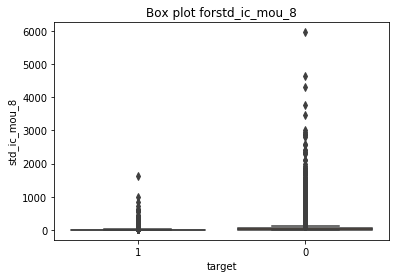

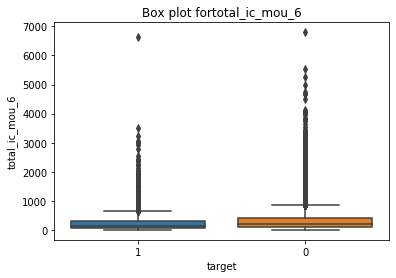

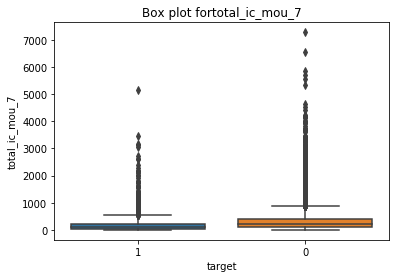

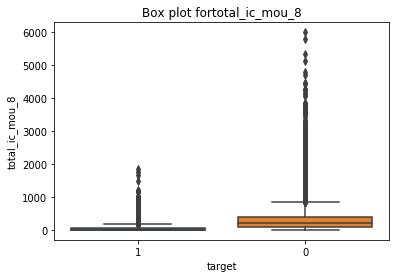

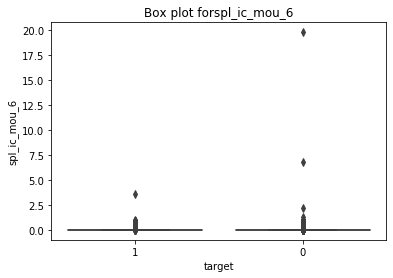

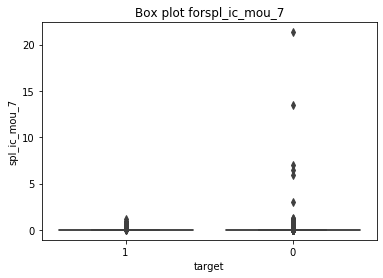

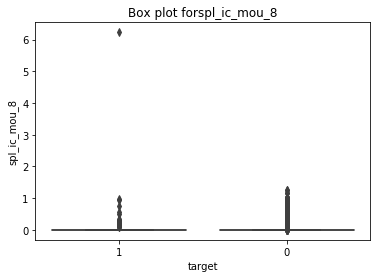

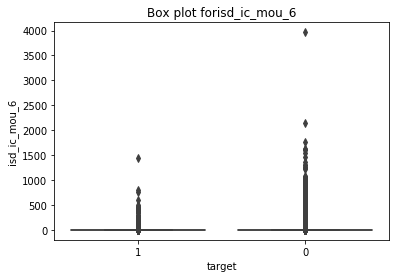

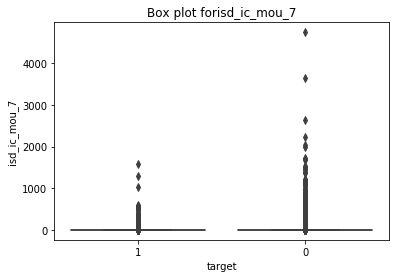

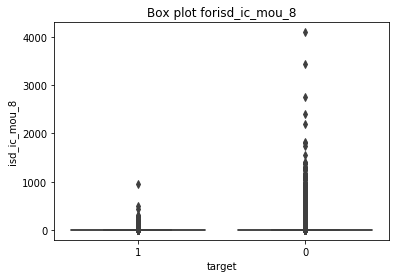

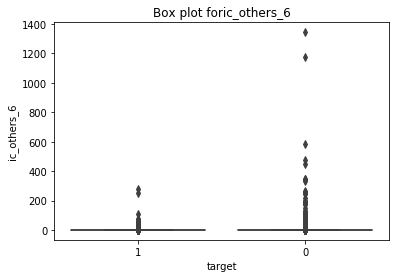

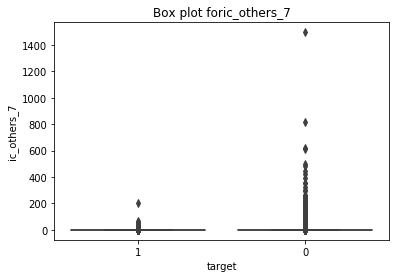

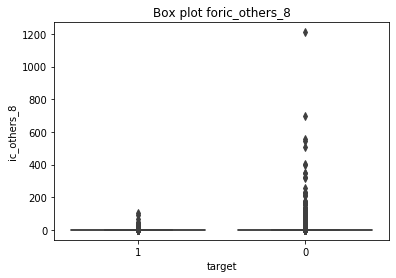

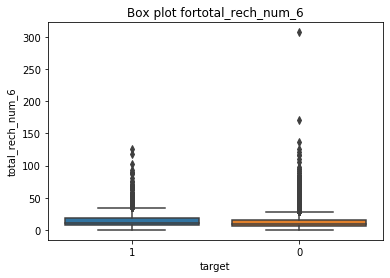

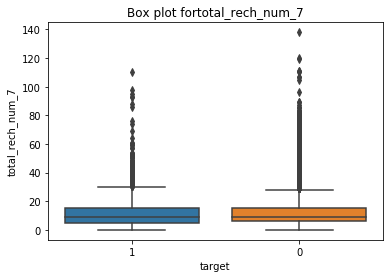

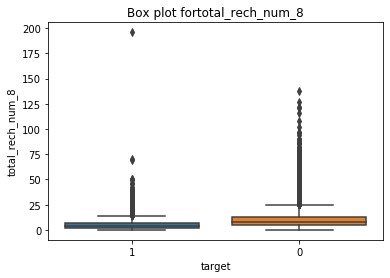

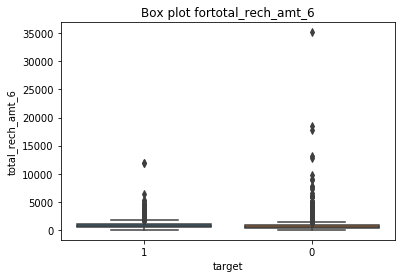

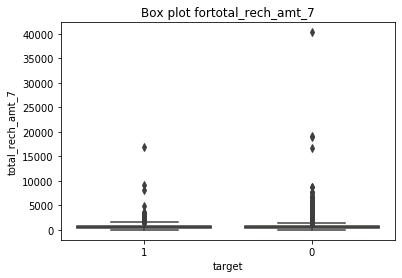

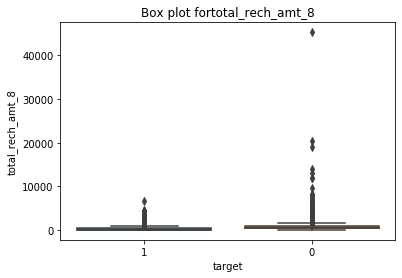

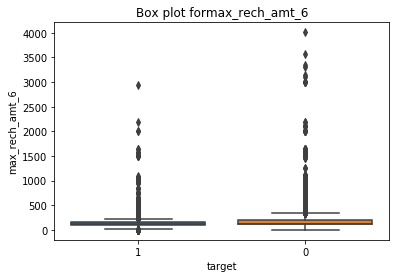

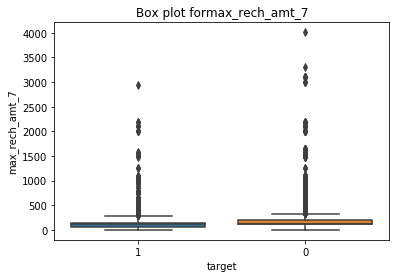

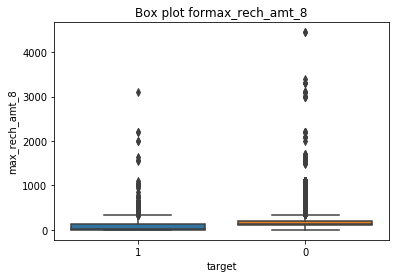

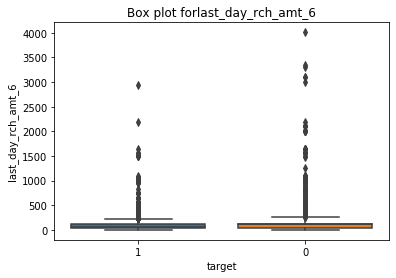

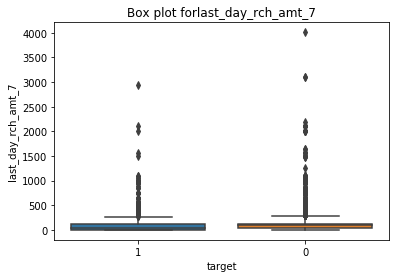

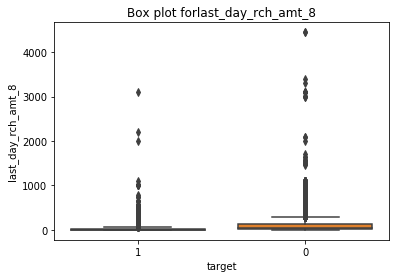

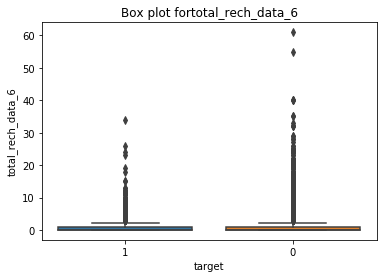

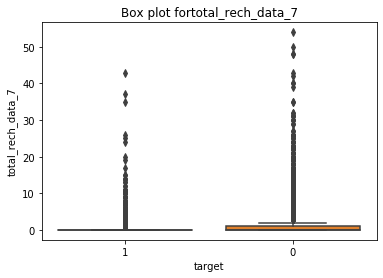

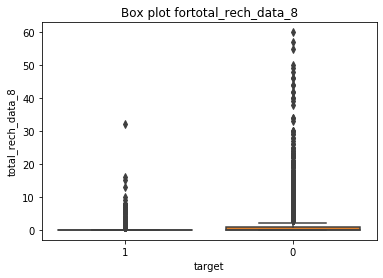

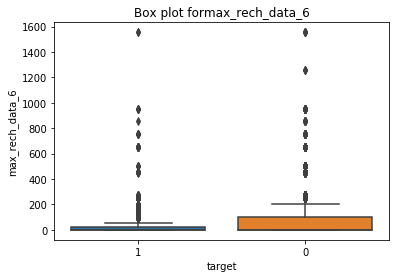

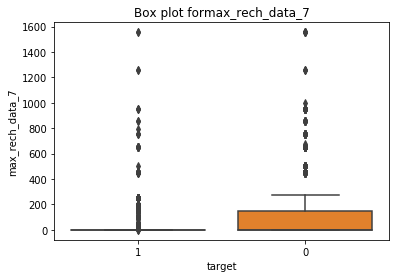

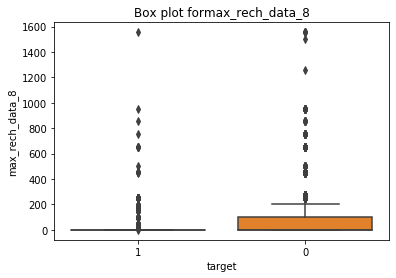

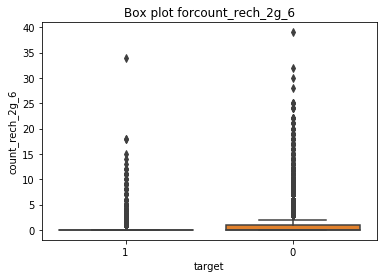

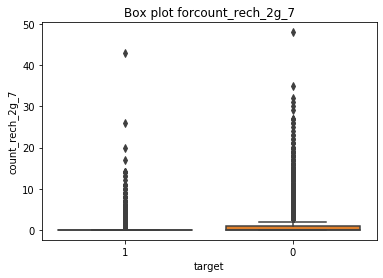

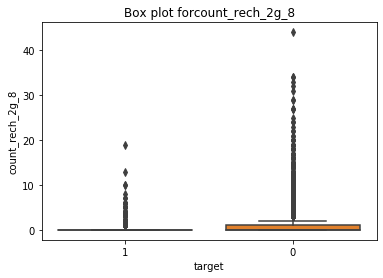

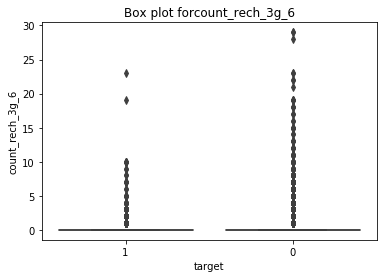

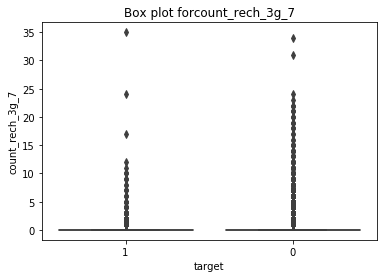

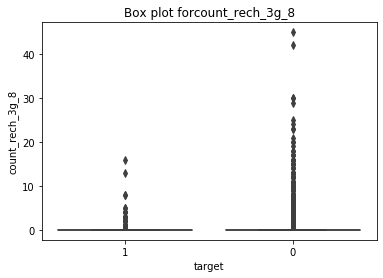

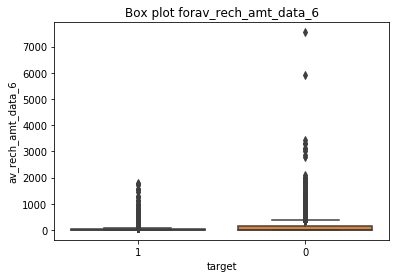

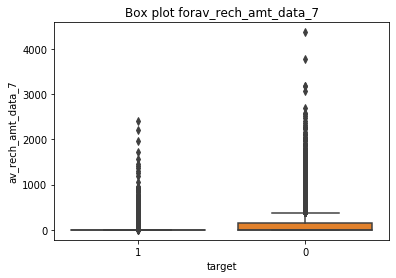

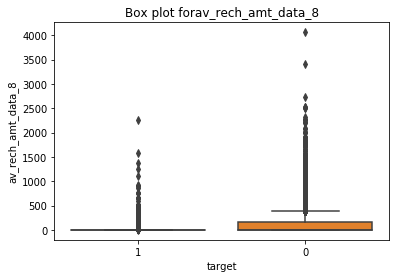

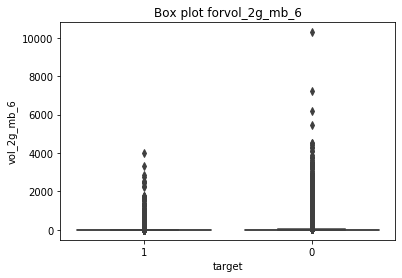

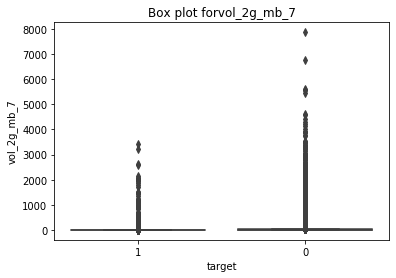

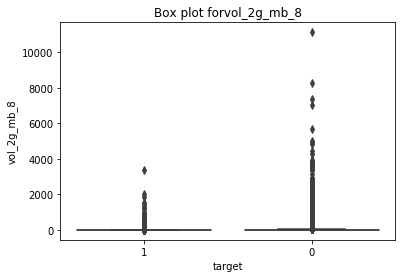

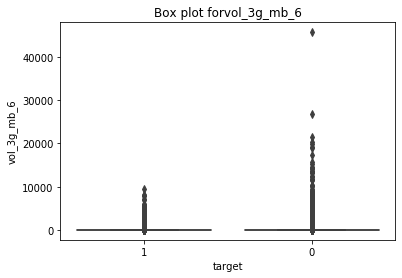

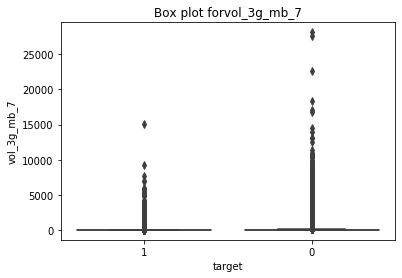

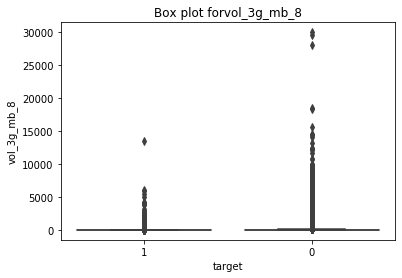

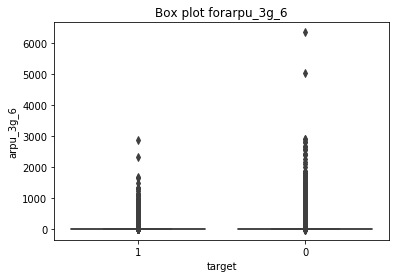

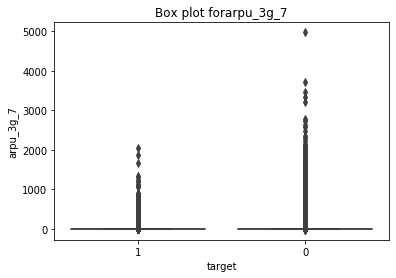

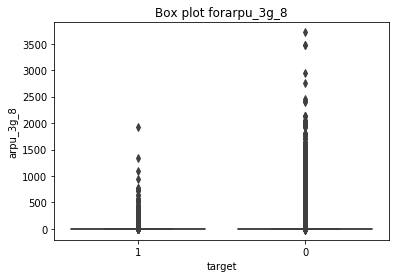

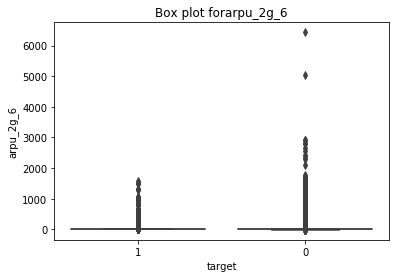

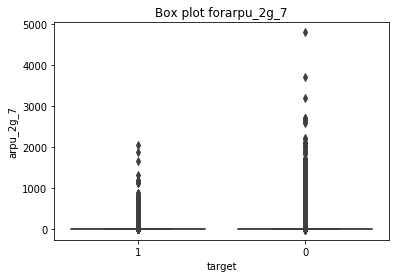

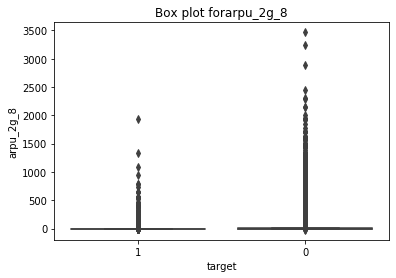

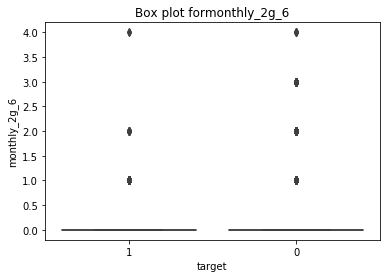

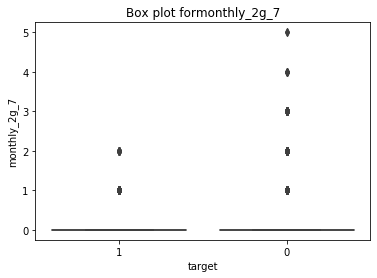

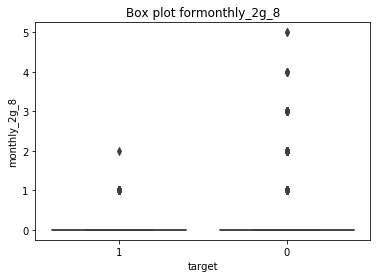

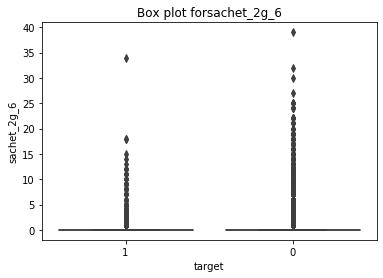

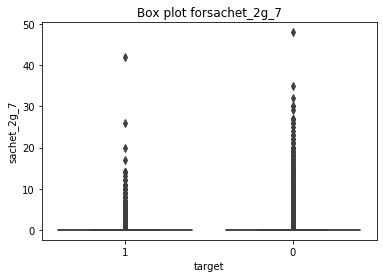

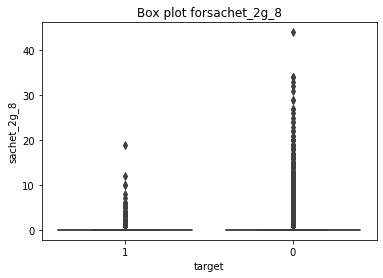

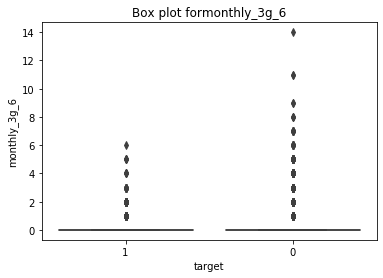

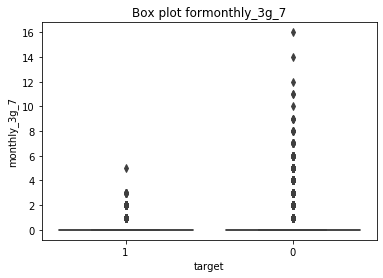

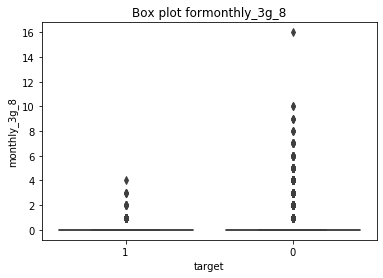

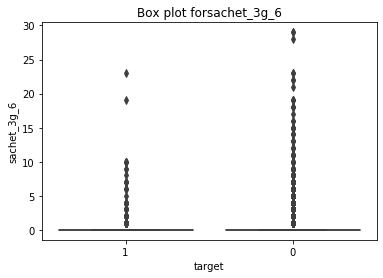

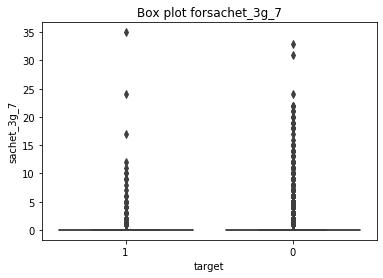

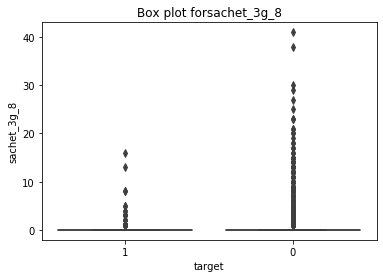

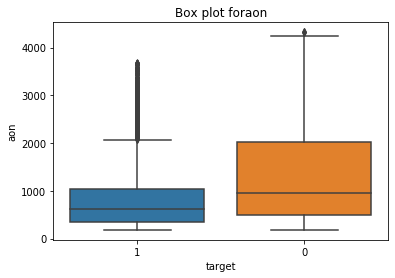

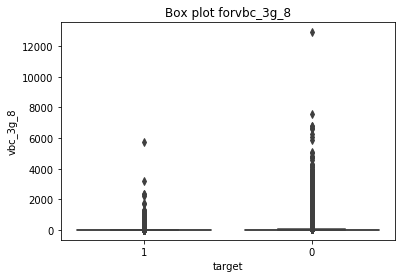

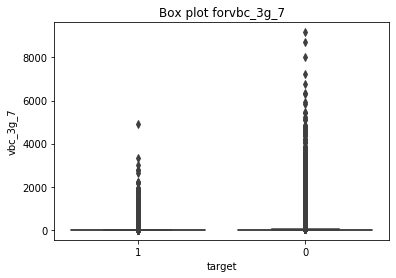

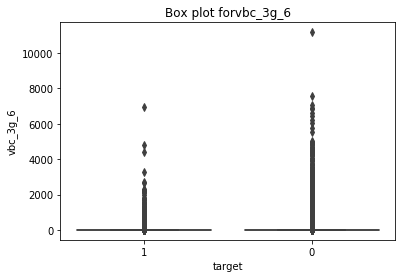

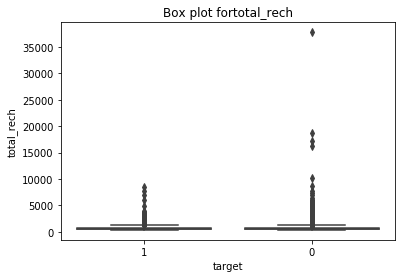

In [51]:
# Building the box plot of numeric variables
for i in num_cols:
    sns.boxplot(x='target',y=i,data=datafinal)
    plt.title('Box plot for'+i)
    plt.show()

#### Insights:
1. From the boxplots of total recharge amount, max recharge amount, total recharge number across the months, we can see a drop in the total recharge amount in the 8th Month(Action Phase) for churned customers.
2. From the 2G & 3G data usage point of view as well we can see that it has dropped in the 8th month for the churned customers.

As we see there are Outliers in almost all of the numeric columns (which is expected for the high value customers). We are going to treat the outliers after the feature engineering.

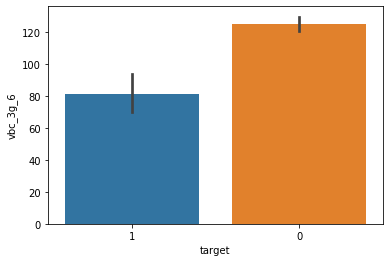

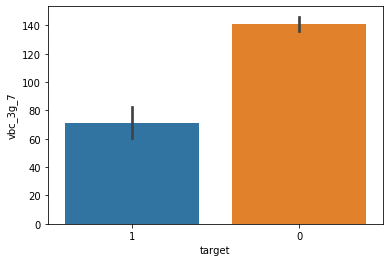

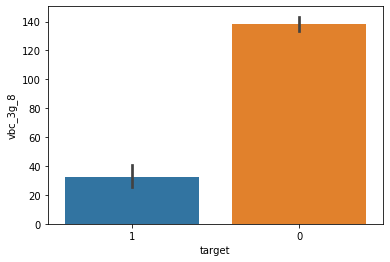

In [52]:
# Plotting volume based cost by target variable
vbc = ['vbc_3g_6','vbc_3g_7','vbc_3g_8']
for i in vbc:
    sns.barplot(x='target', y=i, data=datafinal)
    plt.show()

#### Insights:
1.Looking at the volume based cost for 3G above, it is much lower for churned customers as compared to Non-Churned Customers and also there is a drop in vbc in 8th month

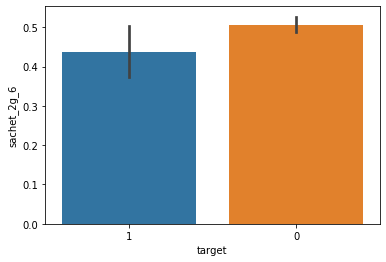

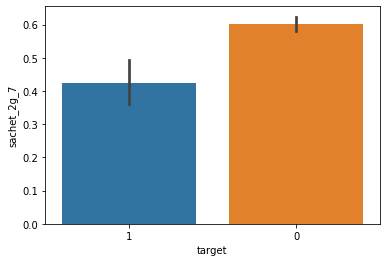

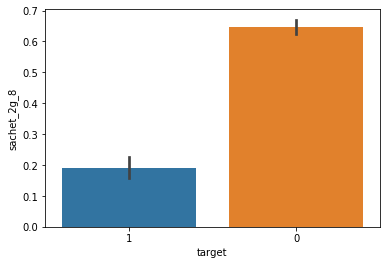

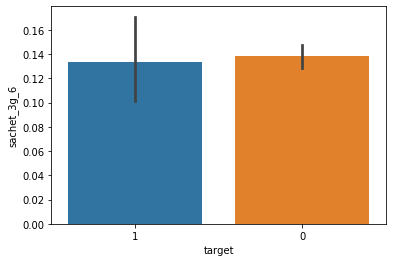

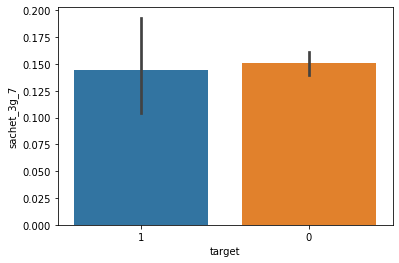

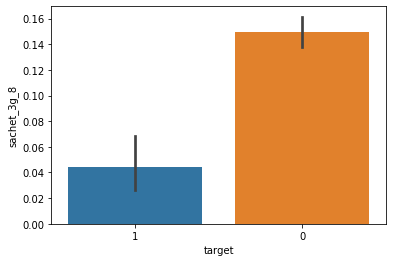

In [53]:
# Plotting sachet by target variable
sachet = [x for x in num_cols if 'sachet' in x]
for j in sachet:
    sns.barplot(x='target', y=j, data=datafinal)
    plt.show()

#### Insights:
1. We can again see that the drop in sachet services(for both 2G & 3G) in 8th month for churned cutsomers.

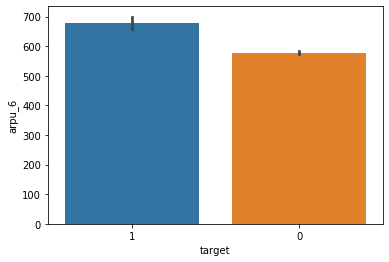

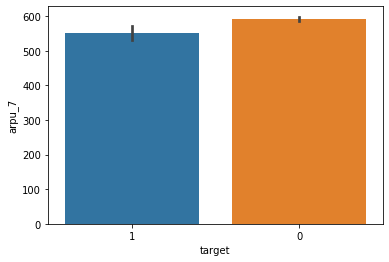

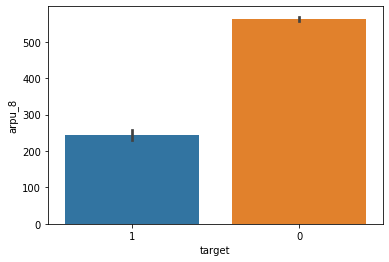

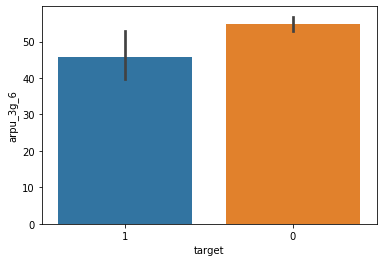

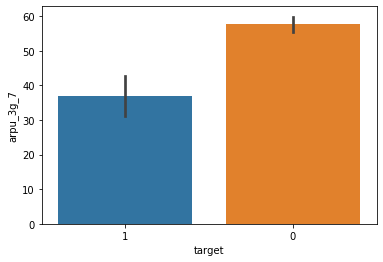

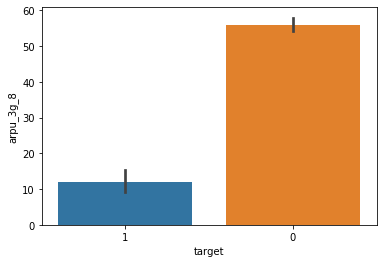

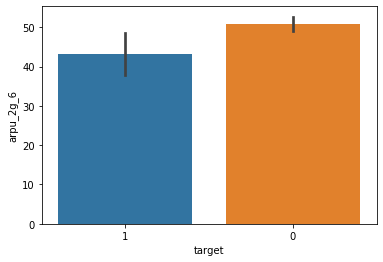

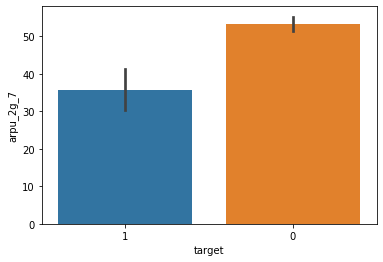

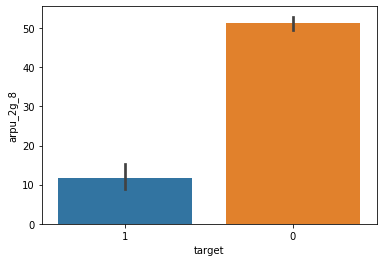

In [54]:
# Plotting arpu by target variable
arpu = [x for x in num_cols if 'arpu' in x]
for k in arpu:
    sns.barplot(x='target', y=k, data=datafinal)
    plt.show()

#### Insights 
1. Here again we can see that there has been a huge drop in average revenue per user in the 8th month for the churned customers

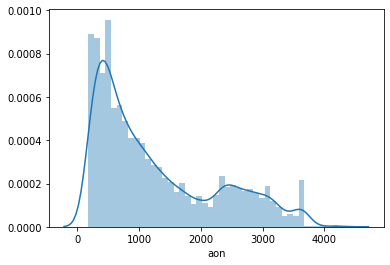

In [55]:
sns.distplot(datafinal['aon'])
plt.show()

From the above plot on age on network, we cansee that majority of the customurs are those who have recently joined this telecom network. Therefore, it becomes quite important to the business to retain maximum of the recetly acquired customers.

## 5. Feature Engineering - Deriving new features

For creating derived variables, we take a look at all the columns of 6th month. Once the derived variables from this data set are identified, we create the same for 7th and 8th month.

In [56]:
# Filtering 6 month columns.
cols = datafinal.columns
cols6 = list(filter(lambda x: '_6' in x,cols))
cols6

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'vbc_3g_6']

1. Analysing all columns containing recharge data

In [57]:
col6_rech = list(filter(lambda x: 'rech' in x ,cols6))
col6_rech

['total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6']

In [58]:
datafinal[col6_rech].describe()

total_rech_num_6  total_rech_amt_6  max_rech_amt_6  total_rech_data_6  max_rech_data_6  count_rech_2g_6  count_rech_3g_6  av_rech_amt_data_6
count      30011.000000      30011.000000    30011.000000       30011.000000     30011.000000     30011.000000     30011.000000        30011.000000
mean          12.121322        697.365833      171.414048           0.937056        56.909666         0.625237         0.311819           90.728204
std            9.543550        539.325984      174.703215           2.176930       105.811594         1.731474         1.065718          191.190963
min            0.000000          0.000000        0.000000           0.000000         0.000000         0.000000         0.000000            0.000000
25%            6.000000        432.000000      110.000000           0.000000         0.000000         0.000000         0.000000            0.000000
50%            9.000000        584.000000      120.000000           0.000000         0.000000         0.000000         0.000000            0.000000
75%           15.000000        837.000000      200.000000           1.000000        98.000000         1.000000         0.000000          154.000000
max          307.000000      35190.000000     4010.000000          61.000000      1555.000000        39.000000        29.000000         7546.000000

There is no column for average recharge amount or for total data recharge amount. Avg. Recharge amount can be calculated as total_rech_amt_6/total_rech_num_6 Total Recharge amount data can be calculated as total_rech_data_6*av_rech_amt_data_6

In [59]:
#Calculating Avg. Recharge and Total Data Recharge Amount.
datafinal['avg_rech_amt_6'] = datafinal['total_rech_amt_6']/datafinal['total_rech_num_6']
datafinal['total_rech_amt_data_6'] = datafinal['total_rech_data_6']*datafinal['av_rech_amt_data_6']

Creating the variables for Month 7 and 8

In [60]:
datafinal['avg_rech_amt_7'] = datafinal['total_rech_amt_7']/datafinal['total_rech_num_7']
datafinal['total_rech_amt_data_7'] = datafinal['total_rech_data_7']*datafinal['av_rech_amt_data_7']
datafinal['avg_rech_amt_8'] = datafinal['total_rech_amt_8']/datafinal['total_rech_num_8']
datafinal['total_rech_amt_data_8'] = datafinal['total_rech_data_8']*datafinal['av_rech_amt_data_8']

In [61]:
datafinal['avg_rech_amt_6'].fillna(0,inplace = True)
datafinal['avg_rech_amt_7'].fillna(0,inplace = True)
datafinal['avg_rech_amt_8'].fillna(0,inplace = True)

2. Analysing colums for 2g and 3g

In [62]:
col6_2g3g = list(filter(lambda x: ('2g' in x) or ('3g' in x) ,cols6))
col6_2g3g

['count_rech_2g_6',
 'count_rech_3g_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'vbc_3g_6']

The following variables can be created : Total Data Consumed = vol_2g_mb_6 +vol_3g_mb_6 Total Monthly services = monthly_2g_6 + monthly_3g_6 Total sachet = sachet_2g_6 + sachet_3g_6

In [63]:
datafinal['total_vol_mb_6'] = datafinal['vol_2g_mb_6'] + datafinal['vol_3g_mb_6']
datafinal['total_monthly_6'] = datafinal['monthly_2g_6'] + datafinal['monthly_3g_6']
datafinal['total_sachet_6'] = datafinal['sachet_2g_6'] + datafinal['sachet_3g_6']

Creating the same variables for Month 7 and 8

In [64]:
datafinal['total_vol_mb_7'] = datafinal['vol_2g_mb_7'] + datafinal['vol_3g_mb_7']
datafinal['total_monthly_7'] = datafinal['monthly_2g_7'] + datafinal['monthly_3g_7']
datafinal['total_sachet_7'] = datafinal['sachet_2g_7'] + datafinal['sachet_3g_7']
datafinal['total_vol_mb_8'] = datafinal['vol_2g_mb_8'] + datafinal['vol_3g_mb_8']
datafinal['total_monthly_8'] = datafinal['monthly_2g_8'] + datafinal['monthly_3g_8']
datafinal['total_sachet_8'] = datafinal['sachet_2g_8'] + datafinal['sachet_3g_8']

In [65]:
datafinal.columns

Index(['mobile_number', 'circle_id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'total_rech_amt_data_8', 'total_vol_mb_6', 'total_monthly_6', 'total_sachet_6', 'total_vol_mb_7', 'total_monthly_7', 'total_sachet_7', 'total_vol_mb_8', 'total_monthly_8', 'total_sachet_8'], dtype='object', length=164)

In [66]:
#dropping the mobile number & circle_id columns as they are not relevant for any analysis or model building 
datafinal.drop(['mobile_number','circle_id'],axis = 1,inplace = True)

In [67]:
#Getting all the numeric columns for each month
num_cols = datafinal.columns.drop(['target'])
num_cols_6 = list(filter(lambda x:x.endswith("_6") , num_cols))
num_cols_7 = list(filter(lambda x:x.endswith("_7") , num_cols))
num_cols_8 = list(filter(lambda x:x.endswith("_8") , num_cols))

In [68]:
len(num_cols_6), len(num_cols_7)

(53, 53)

Since both 6th & 7th month belongs to the 'good' phase of the customer, we can average out & combine all the numeric features of both these months. This would also help us in reducing total features in the dataset.

In [69]:
#Taking the average & merging 6th & 7th months data into one feature -> '..._6&7'
for col in num_cols_6:
    col = col.split('_6')[0]
    datafinal[col+'_6&7'] = (datafinal[col+'_6']+datafinal[col+'_7'])/2

In [70]:
#dropping the individual 6th & 7th months of data since we now have the conbined features of both the months
datafinal.drop(num_cols_6,axis=1,inplace=True)
datafinal.drop(num_cols_7,axis=1,inplace=True)
datafinal.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  vol_3g_mb_8  arpu_3g_8  arpu_2g_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8   aon  vbc_3g_8 target  total_rech  avg_rech_amt_8  total_rech_amt_data_8  total_vol_mb_8  total_monthly_8  total_sachet_8   arpu_6&7  onnet_mou_6&7  offnet_mou_6&7  roam_ic_mou_6&7  roam_og_mou_6&7  loc_og_t2t_mou_6&7  loc_og_t2m_mou_6&7  loc_og_t2f_mou_6&7  \
7   3171.480        52.29        325.91          31.64          38.06             40.28            162.28             53.23              0.00        255.79             12.01             49.14             16.68         77.84         10.01          6.50          0.0          350.16             27.31            121.19             39.53        188.04             30.39            141.33             22.21        193.94          428.74           0.0         31.59        15.14                 7              3638            1580                 779                0.0              0.0              0.0              0.0                 0.0         0.00         0.00       0.00        0.0             0            0             0            0   802     57.74      1      1185.0      519.714286                    0.0            0.00                0               0  1209.5150         56.260         510.295           24.860           18.165              41.385             378.005              58.635   
8    137.362        35.08        136.48           0.00           0.00             12.49             50.54              0.00              7.15         63.04             22.58             75.69              0.00         98.28          0.00         10.23          0.0          171.56              0.31             15.48              0.00         15.79              0.10              0.65              0.00          0.75           16.54           0.0          0.00         0.00                14               120              30                  10                3.0             23.0              3.0              0.0                69.0         0.03        11.94      19.83        0.0             0            3             0            0   315     21.03      0       519.0        8.571429                  207.0           11.97                0               3   435.4720        382.360          87.645            0.000            0.000             257.360              75.770               0.000   
13   593.260       534.24        482.46          72.11           1.44             36.01            294.46             23.51              0.49        353.99            498.23            156.94              0.00        655.18          1.29          4.78          0.0         1015.26             52.58            195.18              7.49        255.26            154.58            317.91              1.91        474.41         1144.53           0.0        393.39        21.44                11               717             130                   0                3.0             23.0              3.0              0.0                69.0         0.02         0.00       0.00        0.2             0            3             0            0  2607      0.00      0       380.0       65.181818                  207.0            0.02                0               3   349.2585        305.075         266.295           83.885           21.620              27.910              99.205               2.270   
16   1

In [71]:
datafinal.shape

(30011, 109)

## 6. Outliers Analysis & Treatment

In [72]:
datafinal.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 109 columns):
arpu_8                     30011 non-null float64
onnet_mou_8                30011 non-null float64
offnet_mou_8               30011 non-null float64
roam_ic_mou_8              30011 non-null float64
roam_og_mou_8              30011 non-null float64
loc_og_t2t_mou_8           30011 non-null float64
loc_og_t2m_mou_8           30011 non-null float64
loc_og_t2f_mou_8           30011 non-null float64
loc_og_t2c_mou_8           30011 non-null float64
loc_og_mou_8               30011 non-null float64
std_og_t2t_mou_8           30011 non-null float64
std_og_t2m_mou_8           30011 non-null float64
std_og_t2f_mou_8           30011 non-null float64
std_og_mou_8               30011 non-null float64
isd_og_mou_8               30011 non-null float64
spl_og_mou_8               30011 non-null float64
og_others_8                30011 non-null float64
total_og_mou_8             30011 non-nul

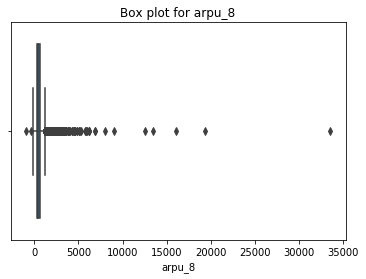

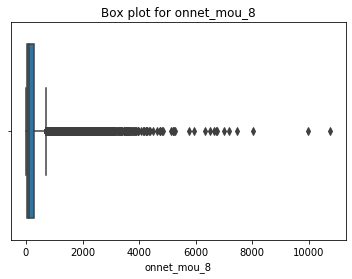

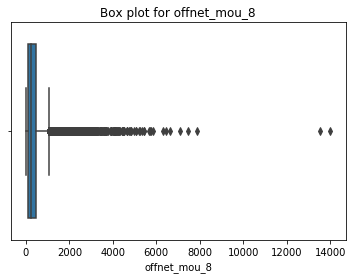

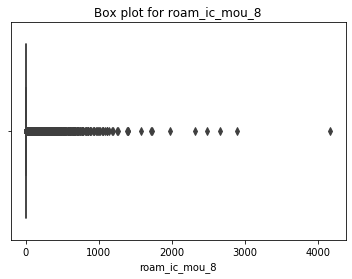

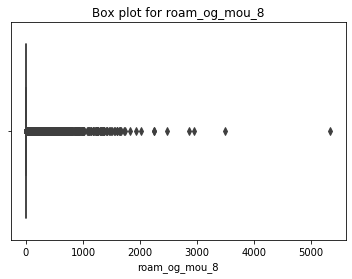

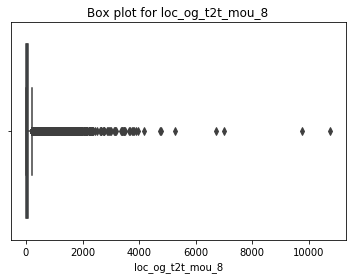

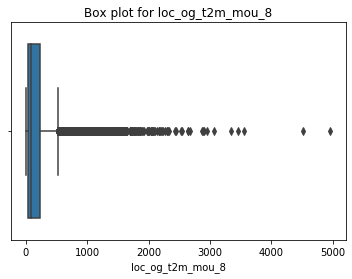

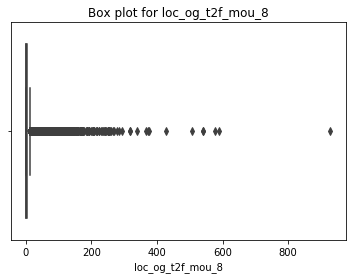

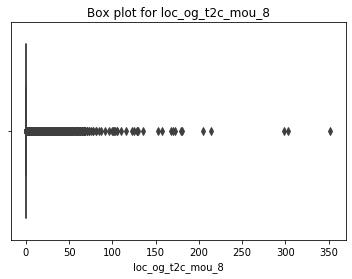

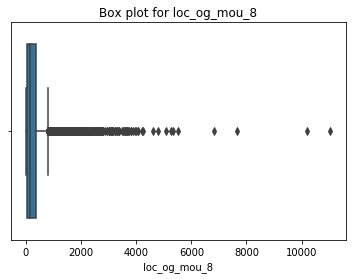

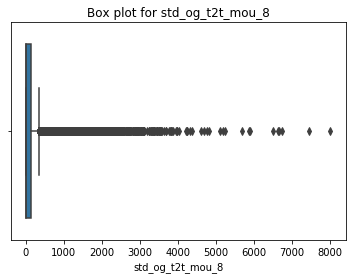

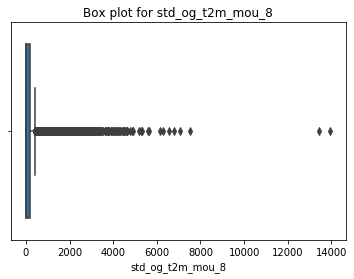

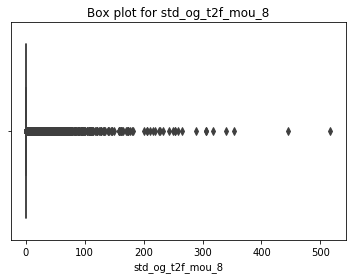

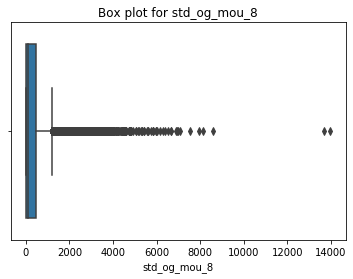

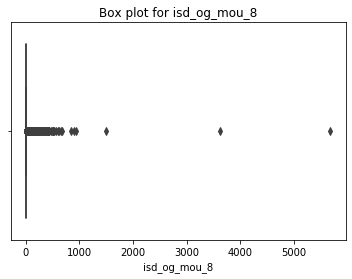

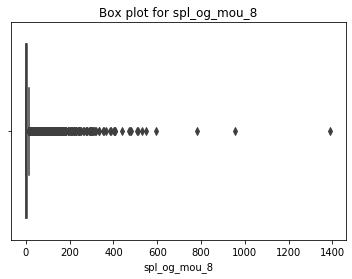

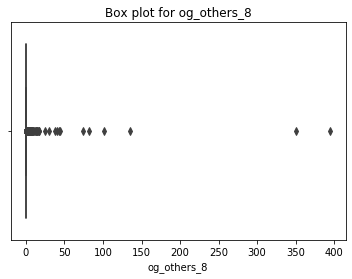

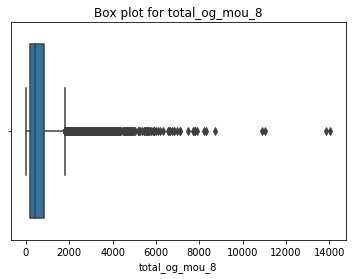

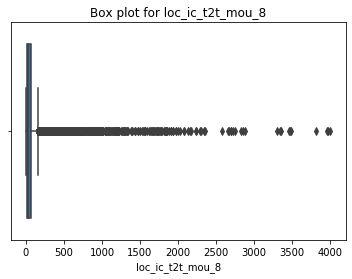

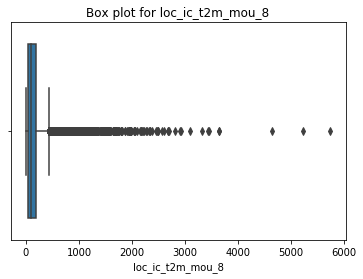

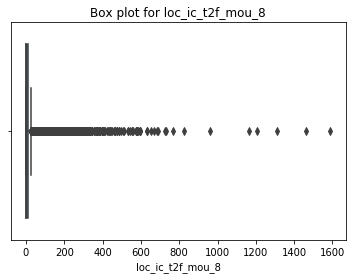

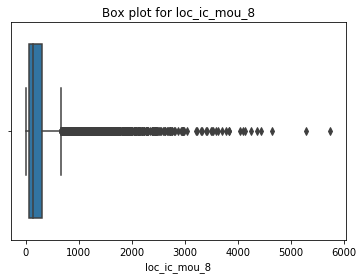

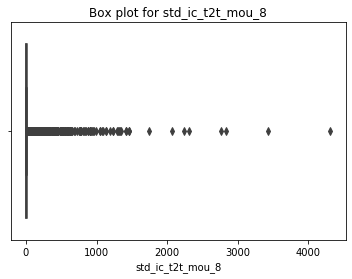

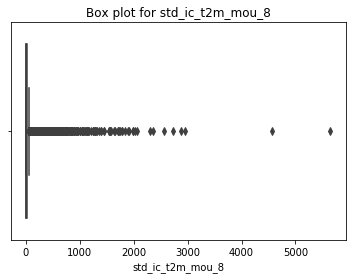

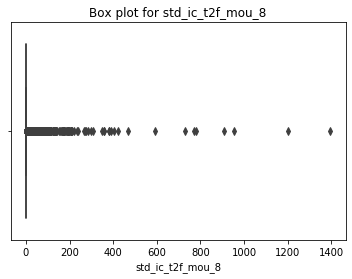

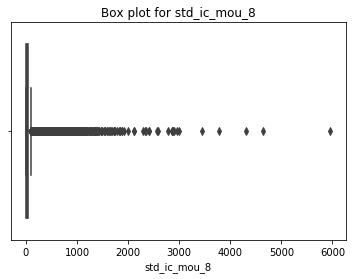

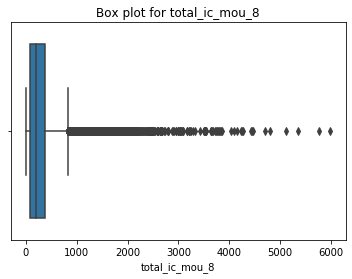

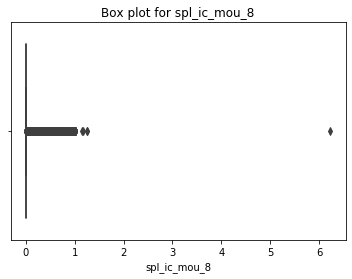

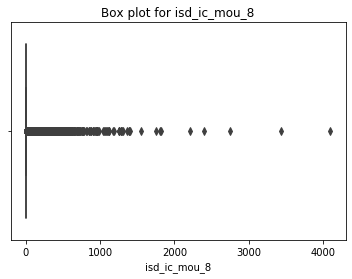

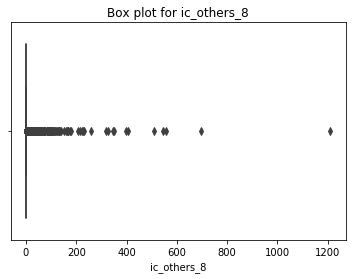

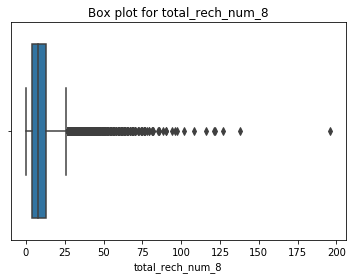

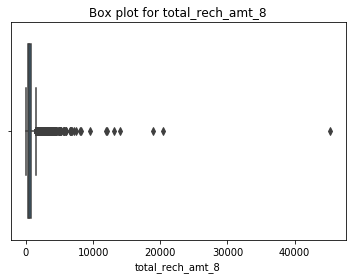

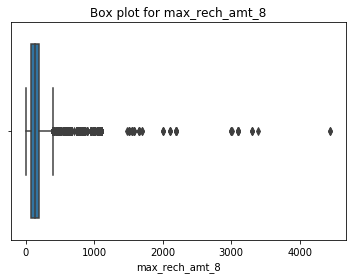

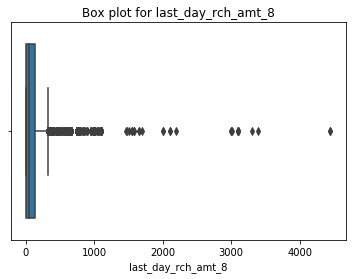

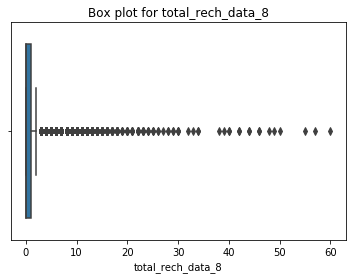

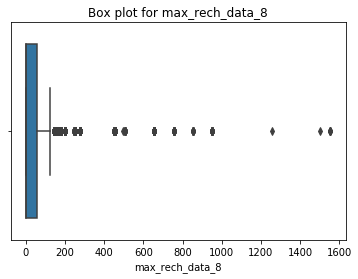

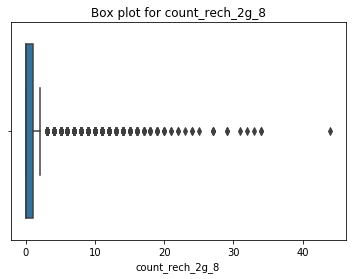

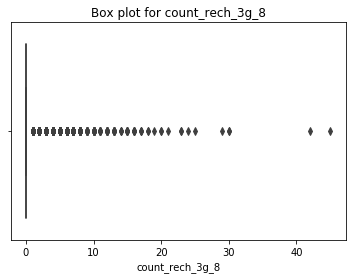

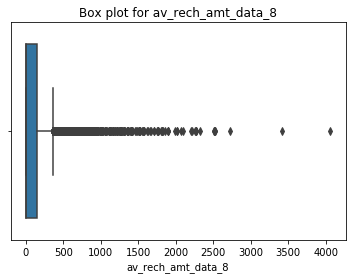

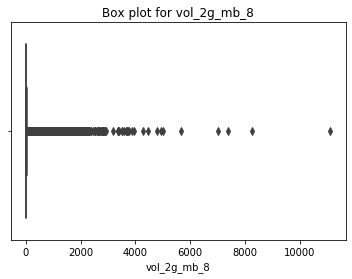

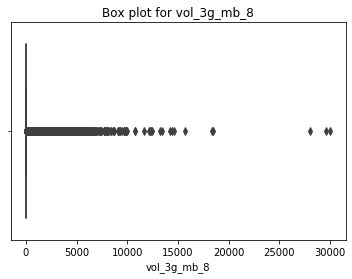

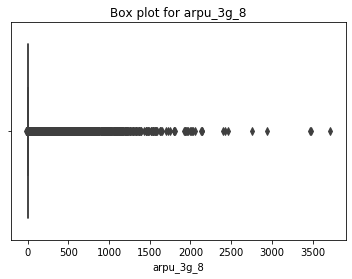

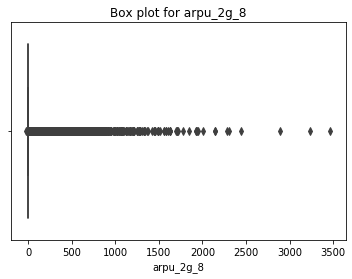

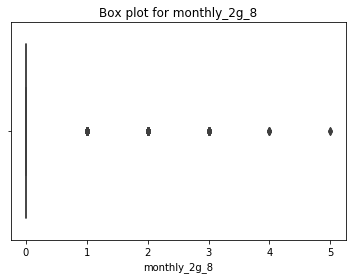

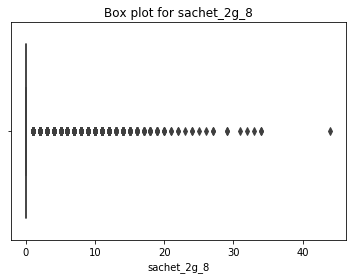

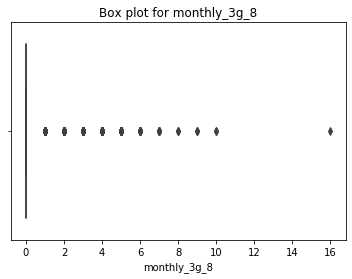

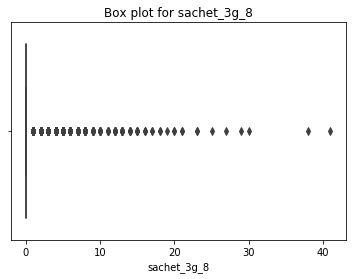

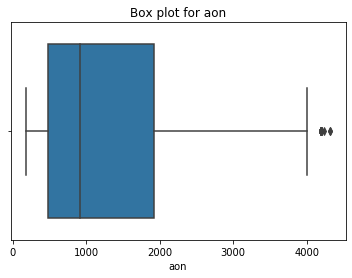

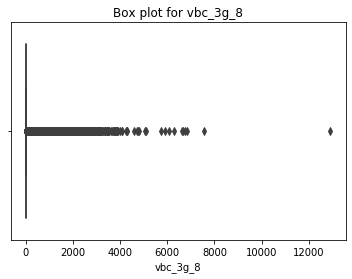

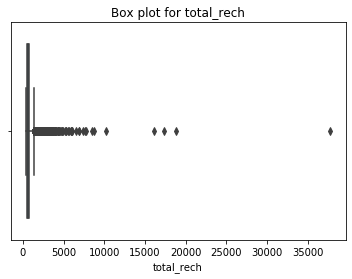

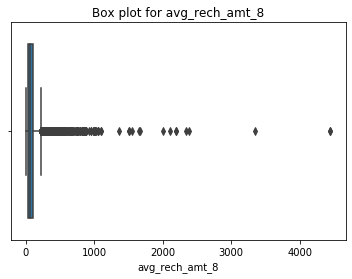

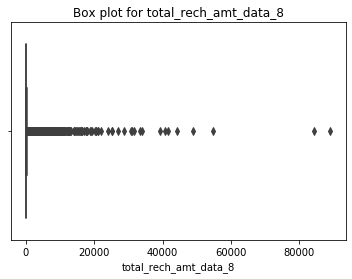

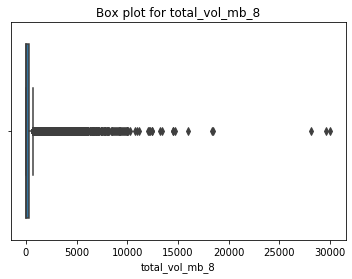

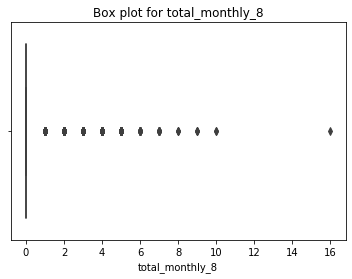

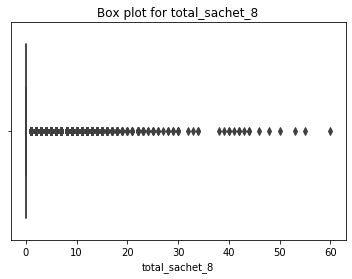

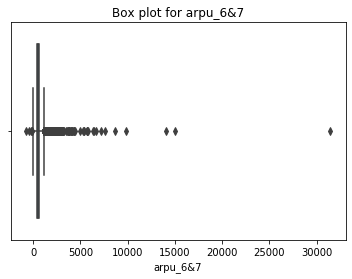

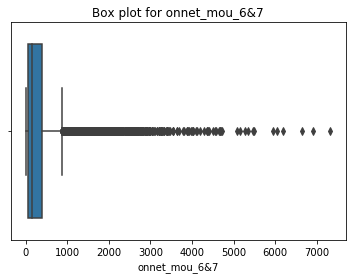

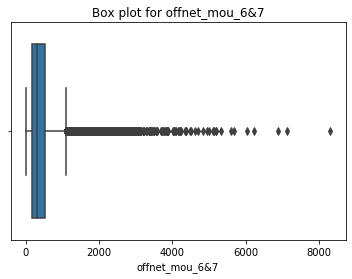

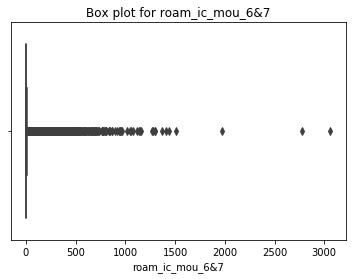

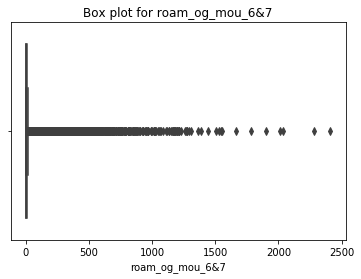

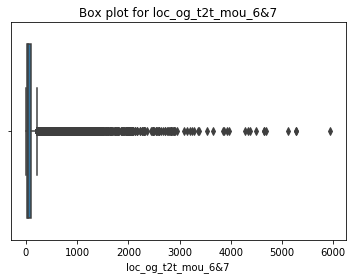

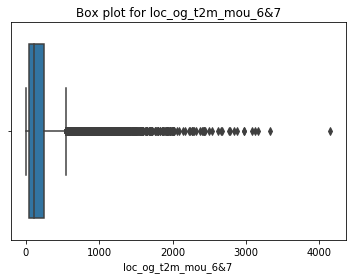

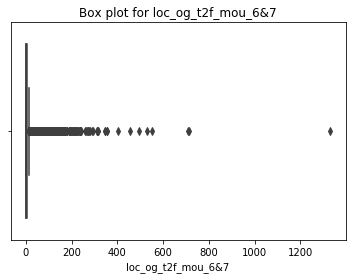

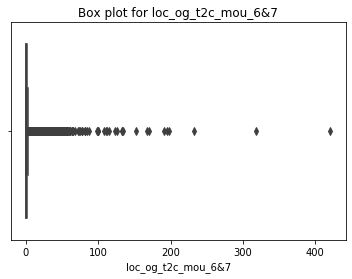

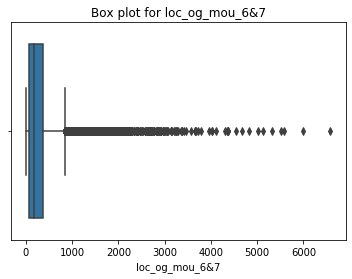

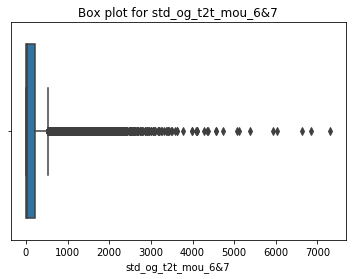

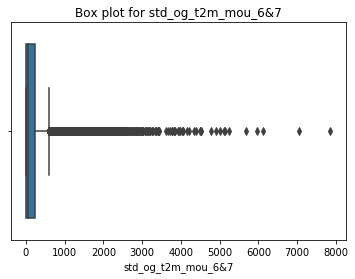

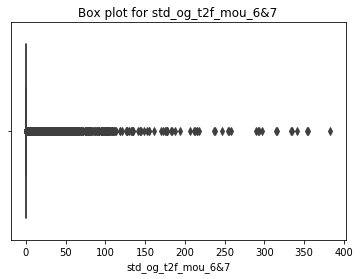

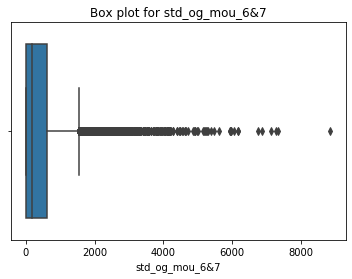

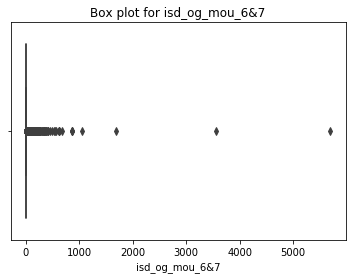

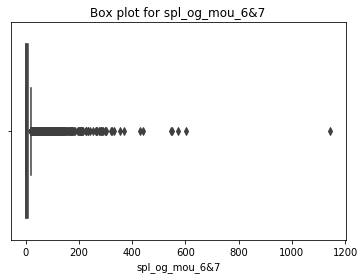

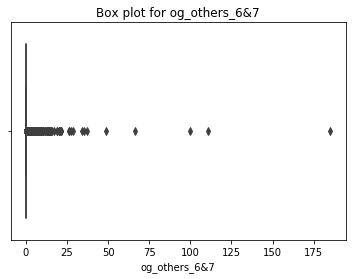

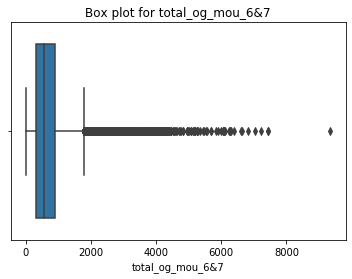

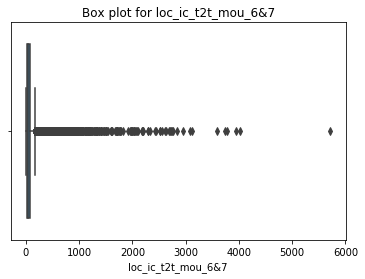

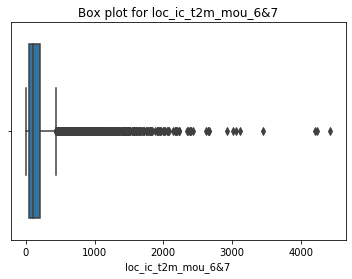

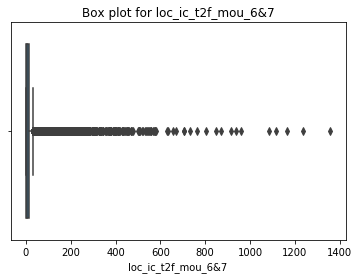

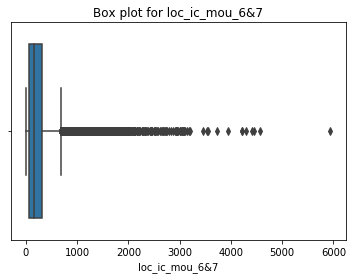

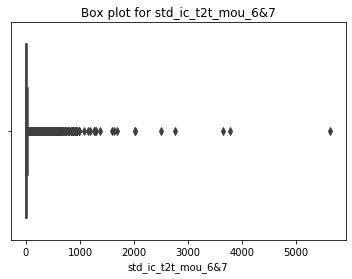

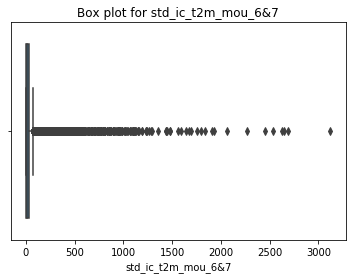

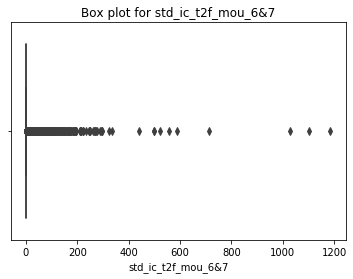

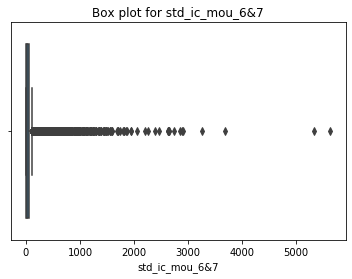

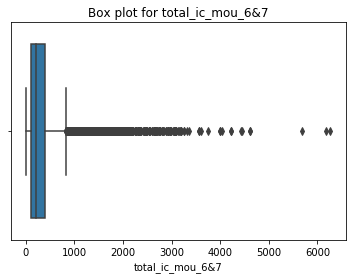

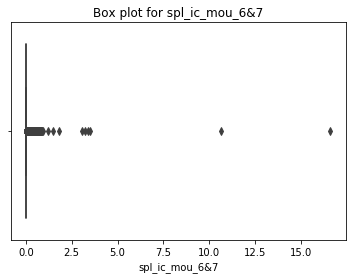

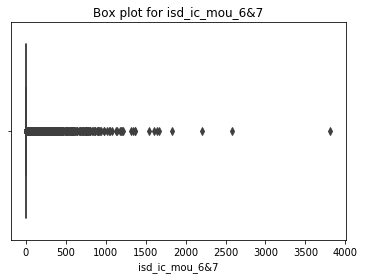

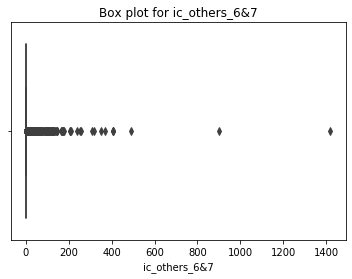

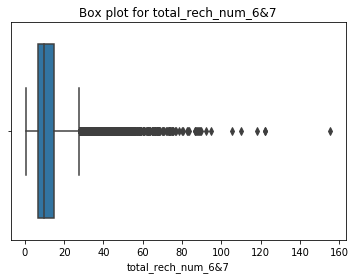

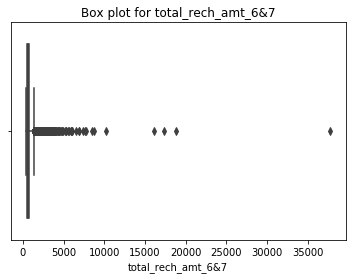

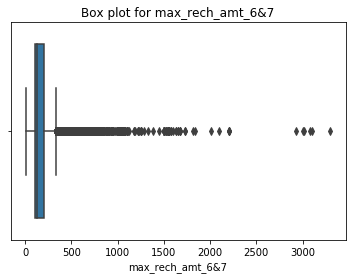

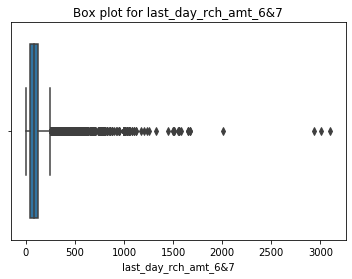

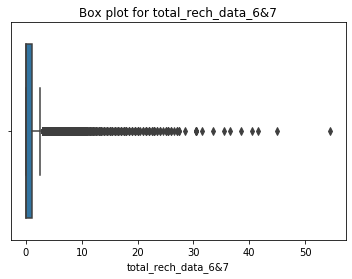

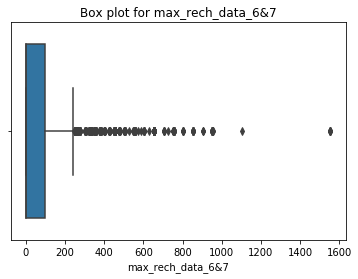

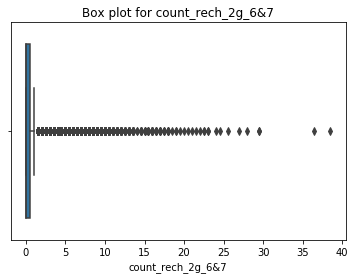

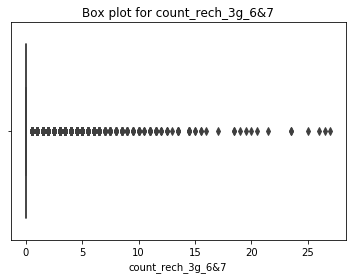

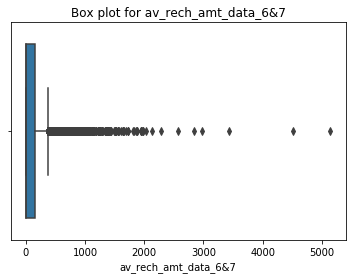

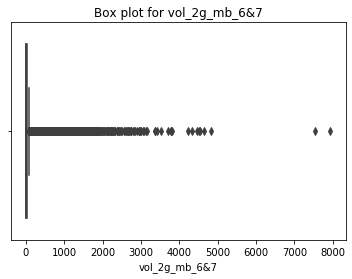

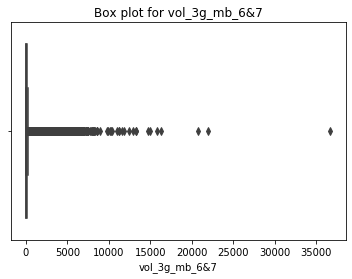

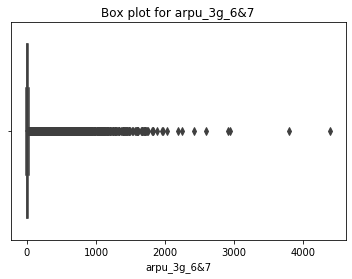

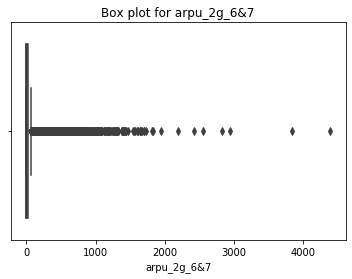

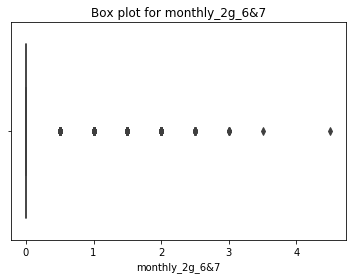

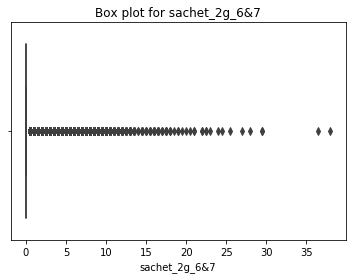

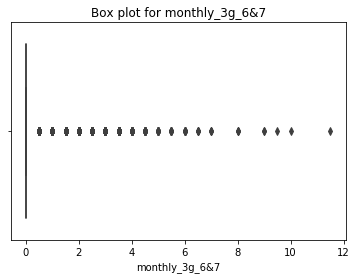

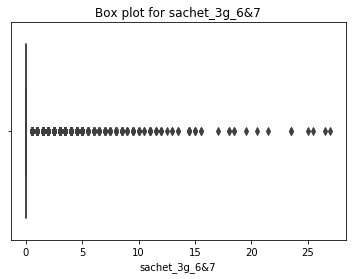

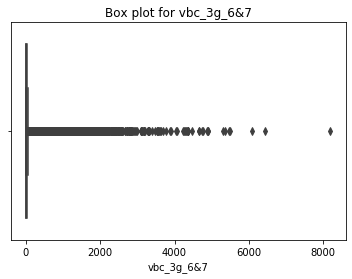

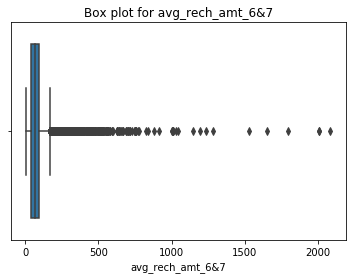

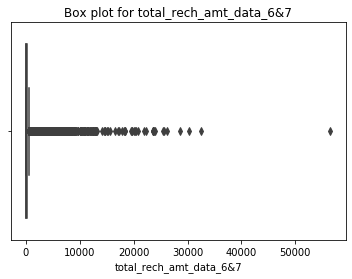

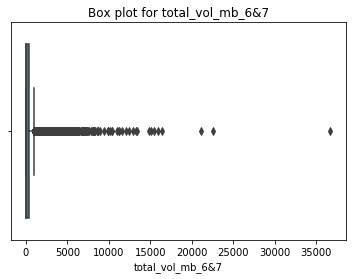

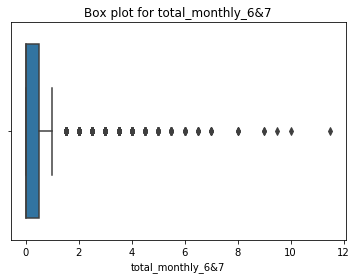

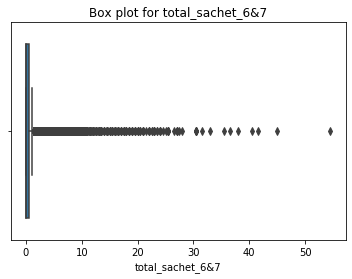

In [73]:
#Building the boxplot again for numeric variables to analyse the outliers in the dataset.
num_cols = datafinal.columns.drop(['target'])
for i in num_cols:
    sns.boxplot(datafinal[i])
    plt.title('Box plot for '+i)
    plt.show()

From the box plots, we can see that all of the numeric features have outliers towards their upper extremes.      
So lets do the hard capping of the outliers as soft capping would not help much

In [74]:
#taking out the 'og_others_8' as capping would affect all of the values of this feature
cap_cols = num_cols.drop('og_others_8')

In [75]:
#Applying hard capping to all the numeric features
print('Count of values capped for each of the features:')
for col in cap_cols:
    q = datafinal[col].quantile(0.95)
    datafinal[col][datafinal[col]>=q] = q
    print(col+' -> ',len(datafinal[datafinal[col]>=q]))

Count of values capped for each of the features:
arpu_8 ->  1501
onnet_mou_8 ->  1501
offnet_mou_8 ->  1501
roam_ic_mou_8 ->  1501
roam_og_mou_8 ->  1501
loc_og_t2t_mou_8 ->  1501
loc_og_t2m_mou_8 ->  1501
loc_og_t2f_mou_8 ->  1501
loc_og_t2c_mou_8 ->  1503
loc_og_mou_8 ->  1501
std_og_t2t_mou_8 ->  1501
std_og_t2m_mou_8 ->  1502
std_og_t2f_mou_8 ->  1503
std_og_mou_8 ->  1501
isd_og_mou_8 ->  1508
spl_og_mou_8 ->  1502
total_og_mou_8 ->  1501
loc_ic_t2t_mou_8 ->  1501
loc_ic_t2m_mou_8 ->  1501
loc_ic_t2f_mou_8 ->  1501
loc_ic_mou_8 ->  1501
std_ic_t2t_mou_8 ->  1501
std_ic_t2m_mou_8 ->  1501
std_ic_t2f_mou_8 ->  1502
std_ic_mou_8 ->  1501
total_ic_mou_8 ->  1501
spl_ic_mou_8 ->  1682
isd_ic_mou_8 ->  1501
ic_others_8 ->  1502
total_rech_num_8 ->  1648
total_rech_amt_8 ->  1502
max_rech_amt_8 ->  1549
last_day_rch_amt_8 ->  2024
total_rech_data_8 ->  1734
max_rech_data_8 ->  2649
count_rech_2g_8 ->  1867
count_rech_3g_8 ->  1832
av_rech_amt_data_8 ->  1505
vol_2g_mb_8 ->  1501
vol_3g_m

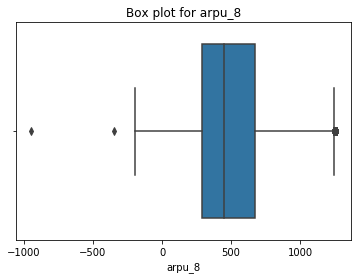

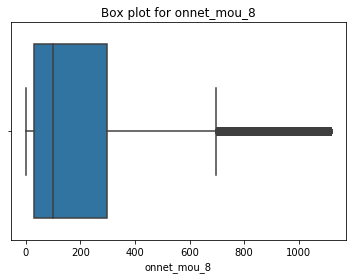

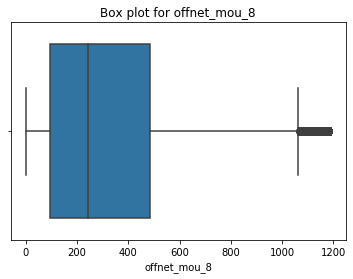

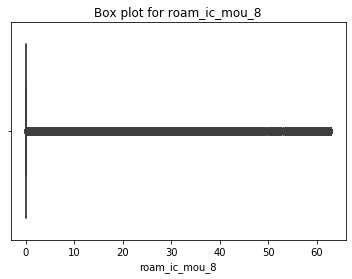

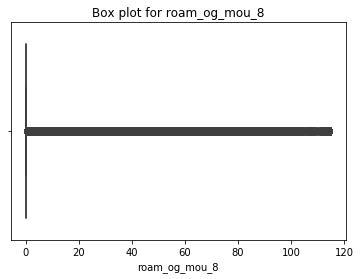

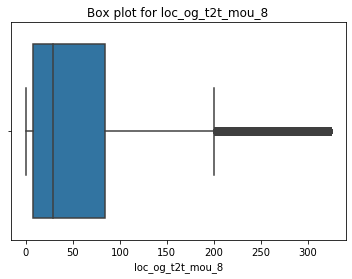

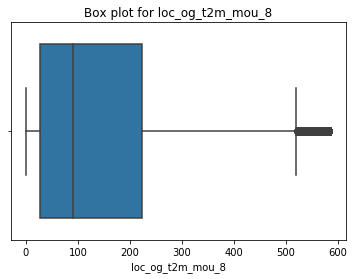

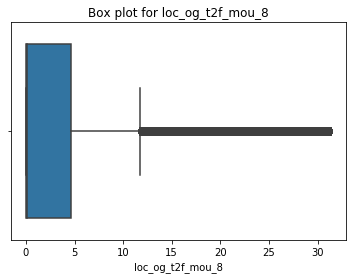

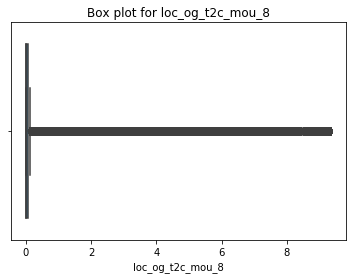

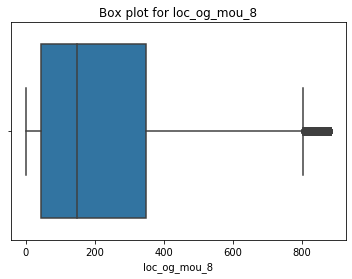

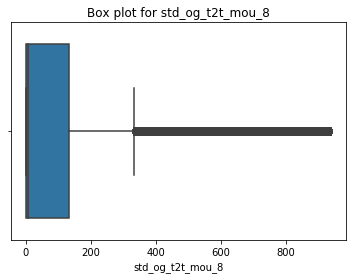

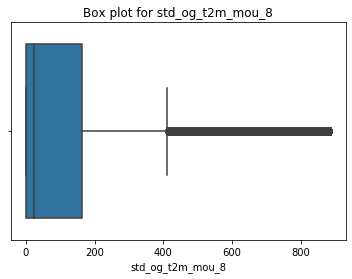

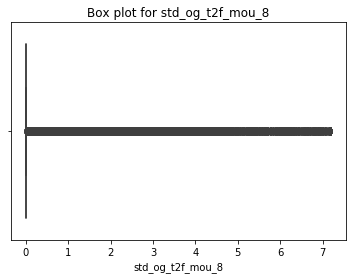

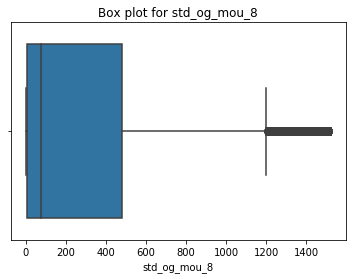

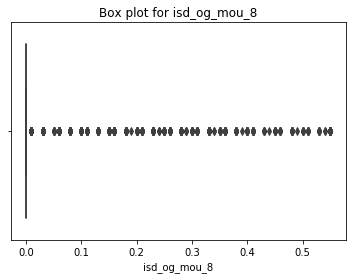

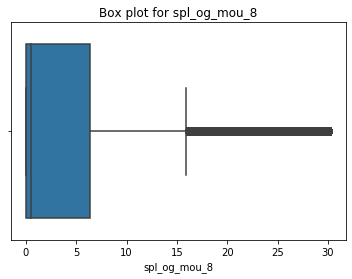

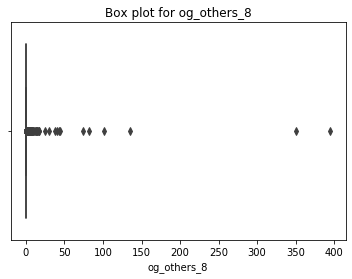

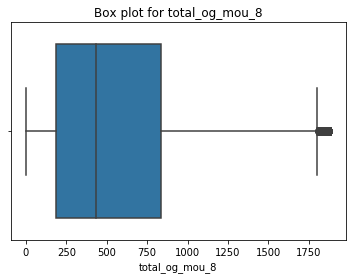

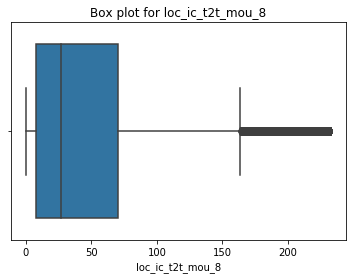

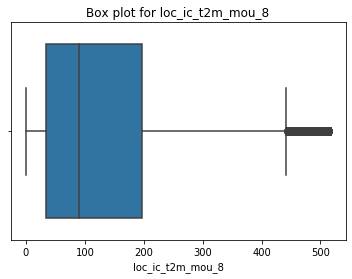

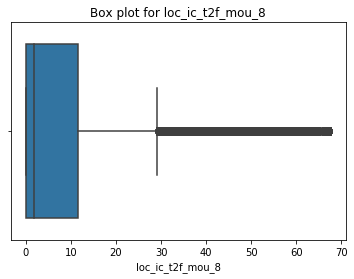

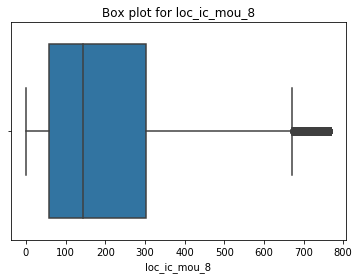

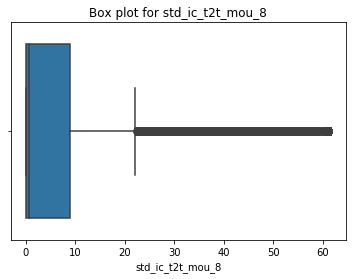

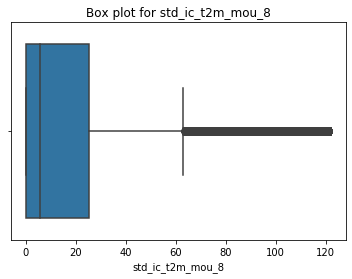

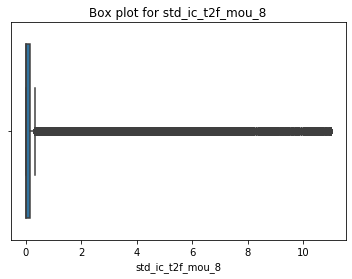

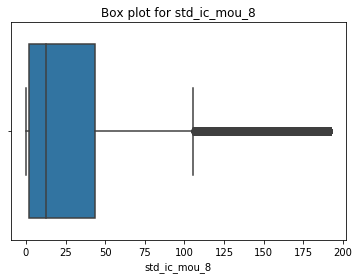

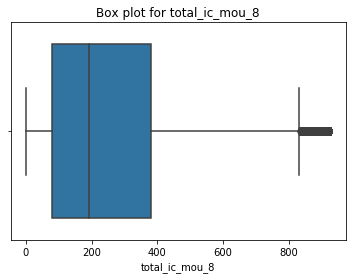

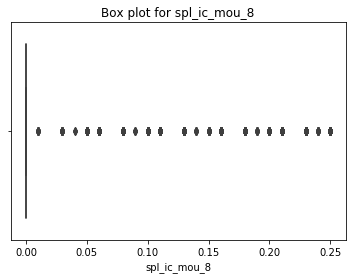

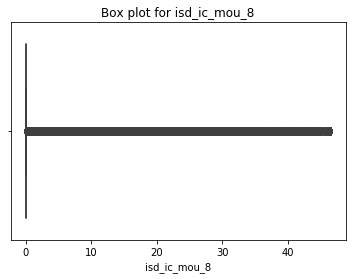

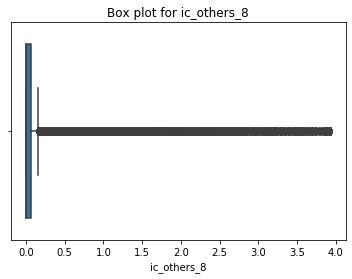

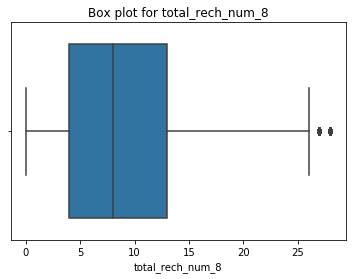

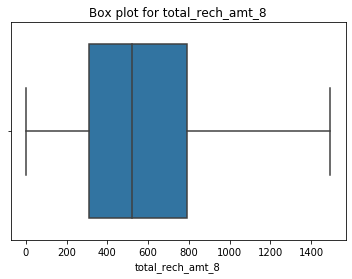

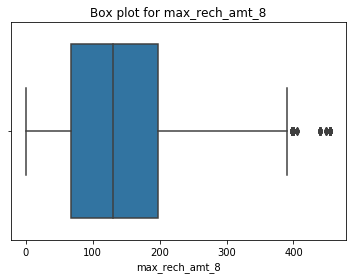

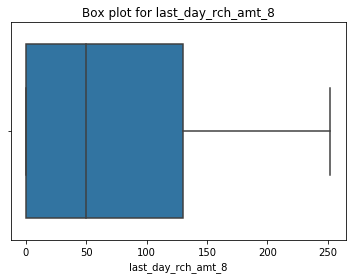

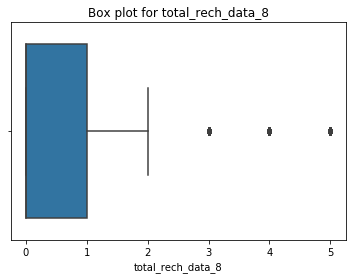

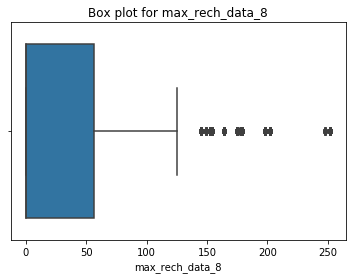

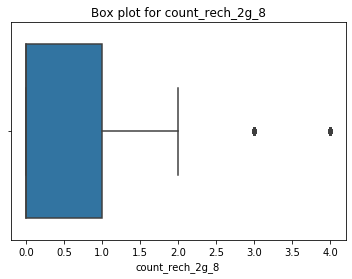

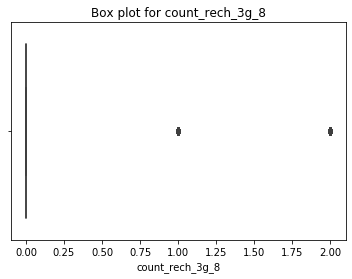

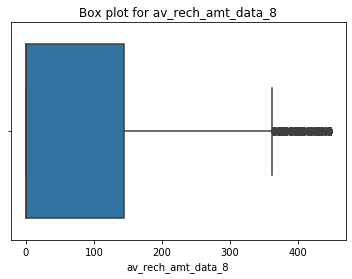

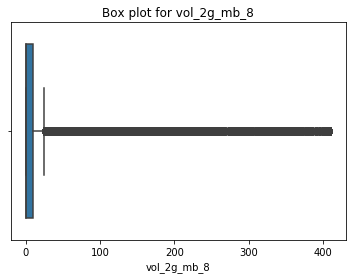

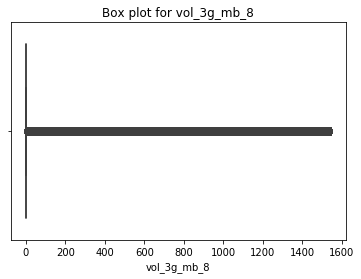

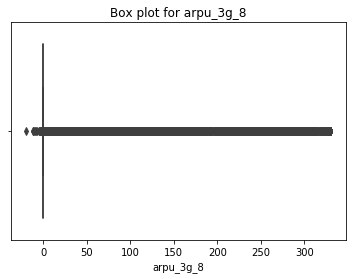

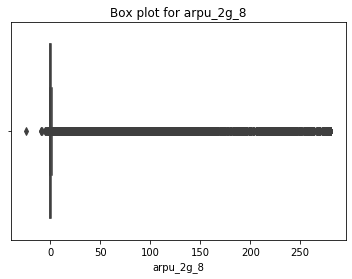

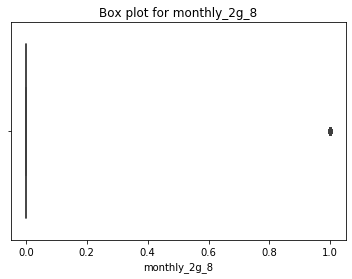

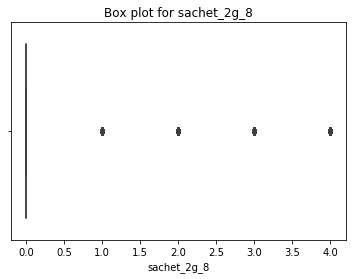

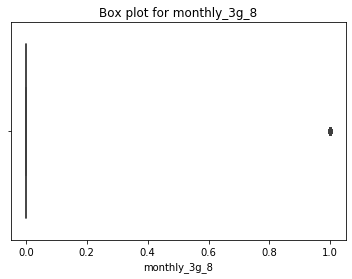

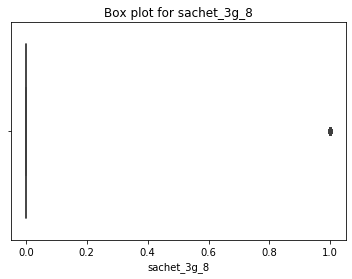

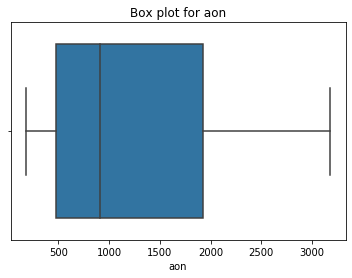

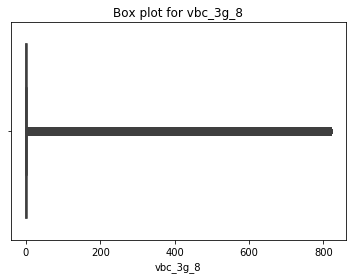

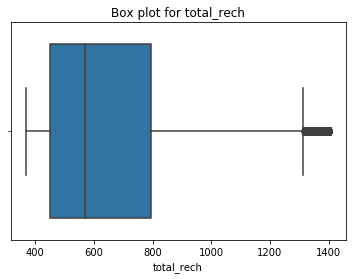

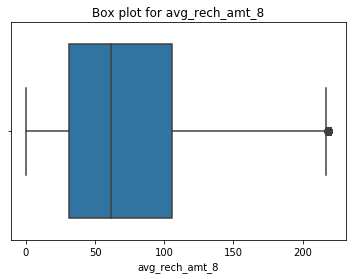

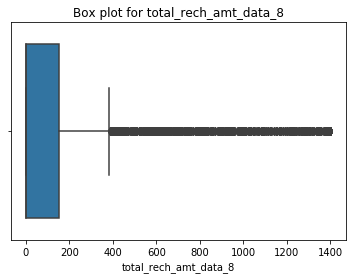

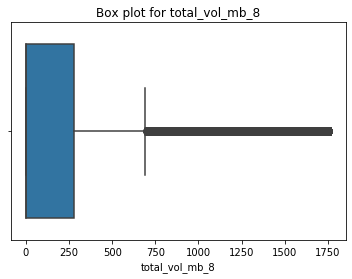

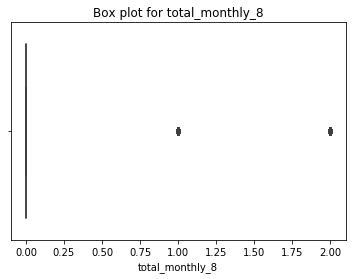

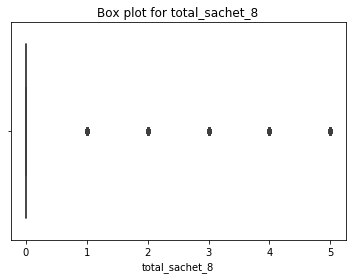

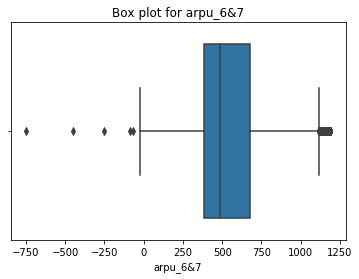

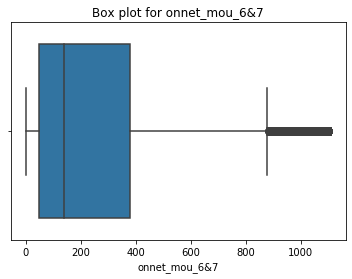

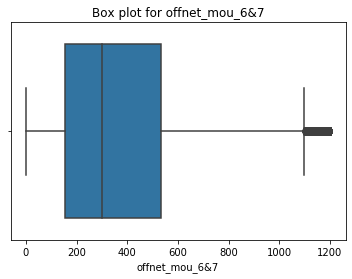

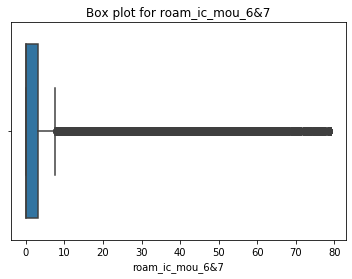

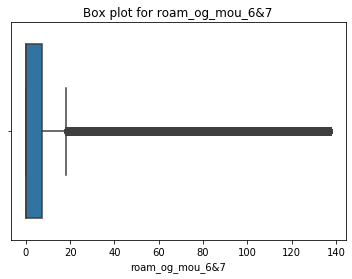

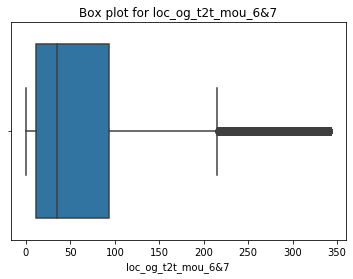

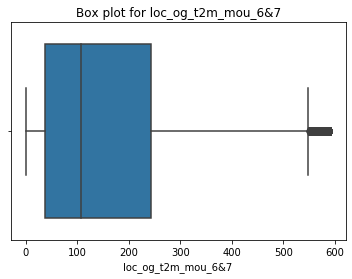

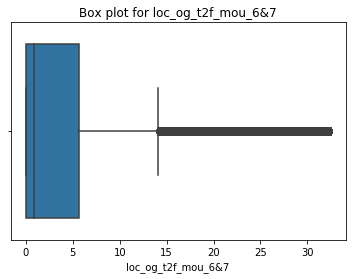

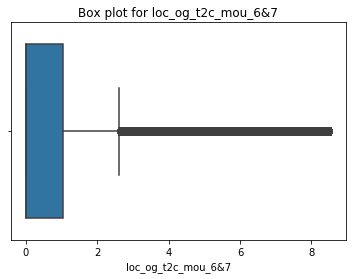

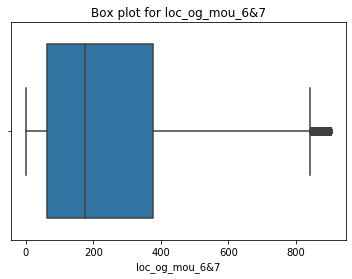

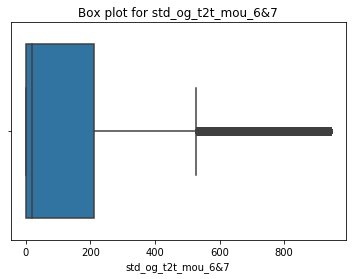

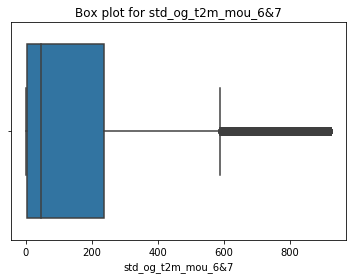

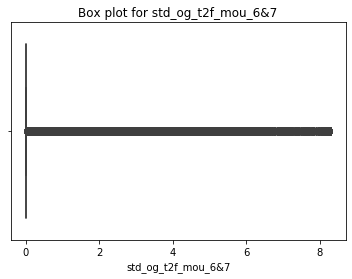

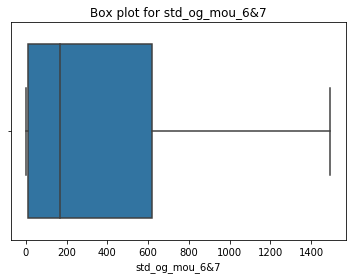

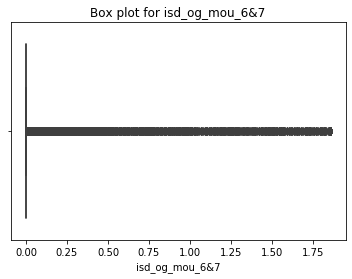

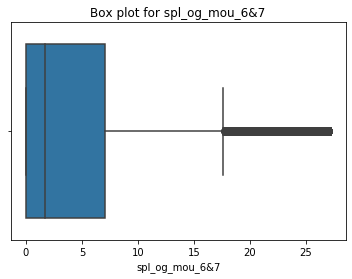

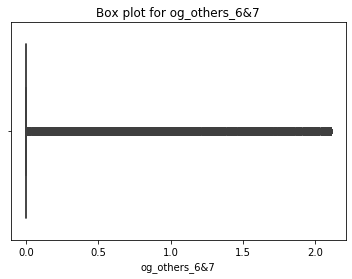

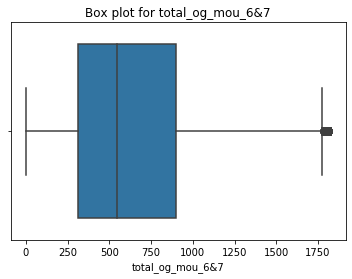

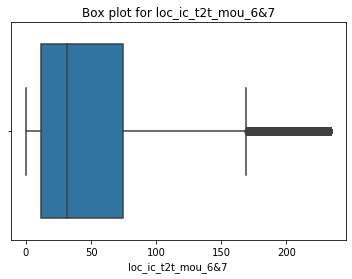

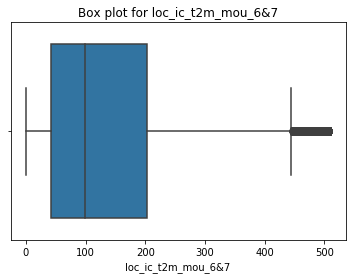

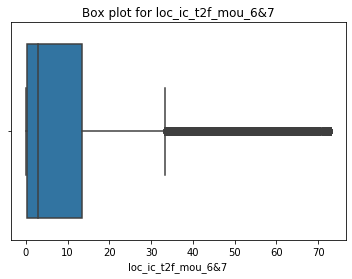

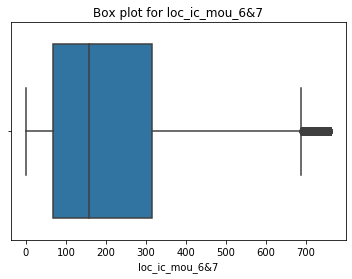

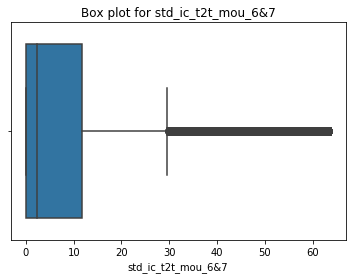

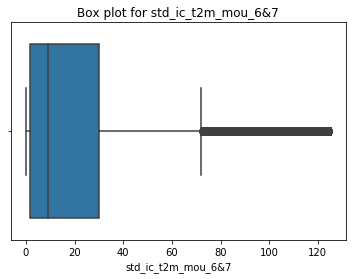

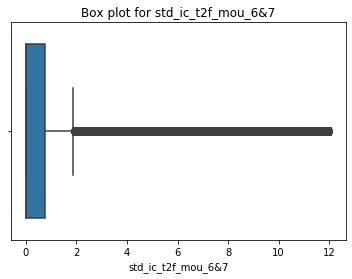

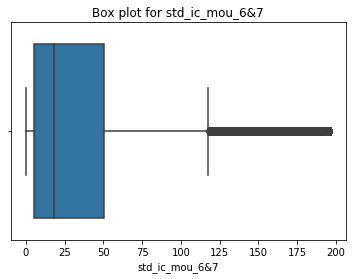

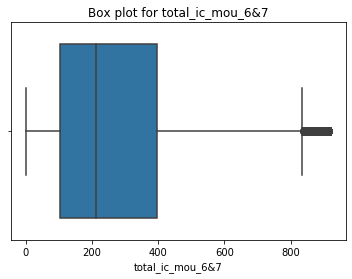

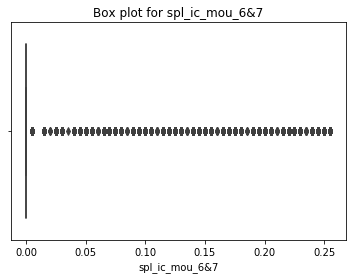

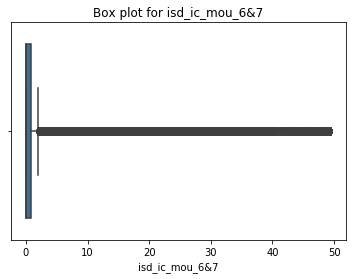

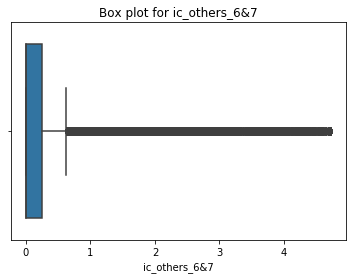

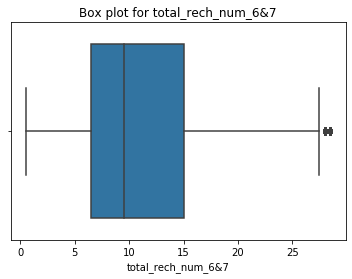

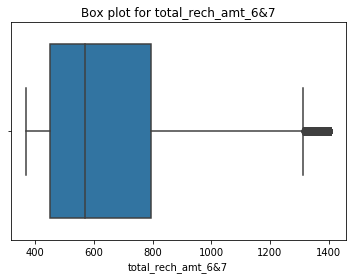

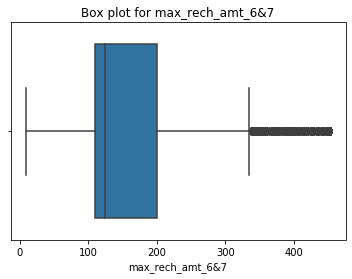

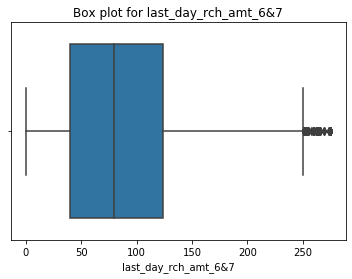

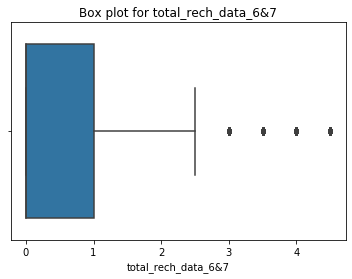

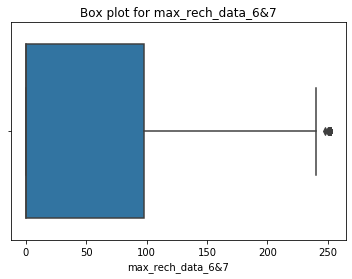

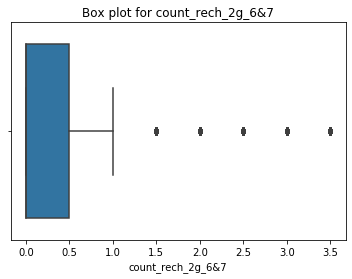

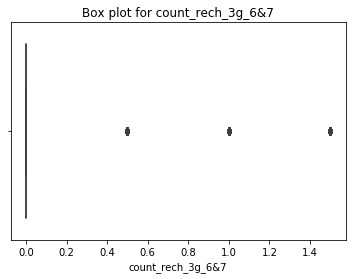

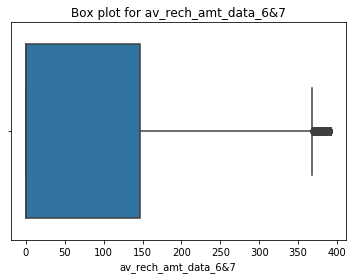

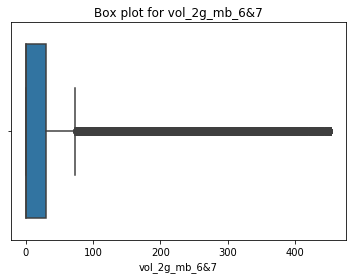

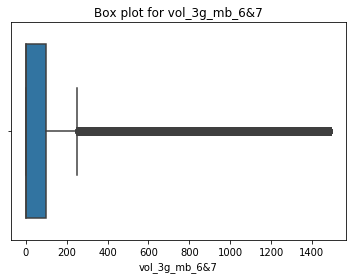

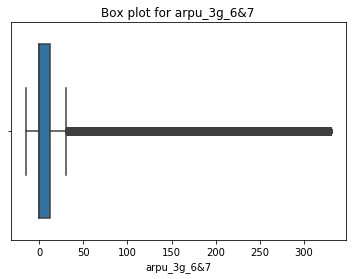

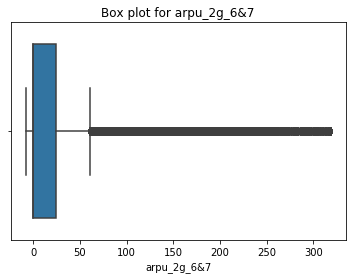

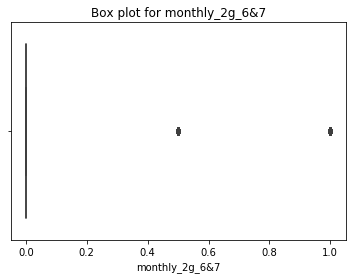

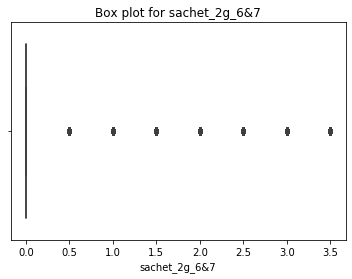

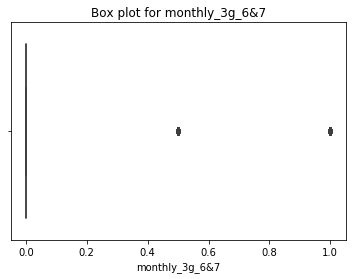

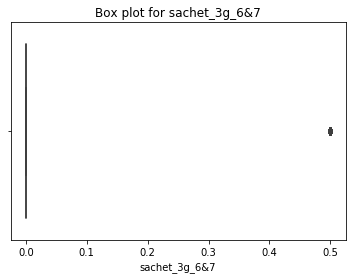

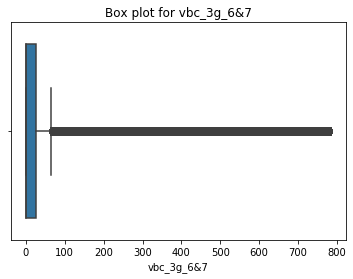

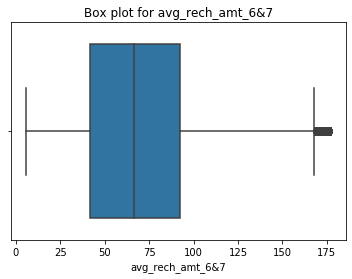

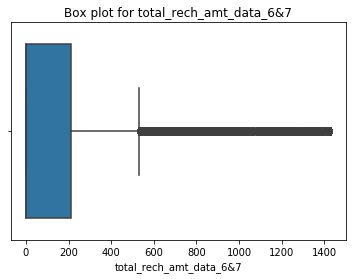

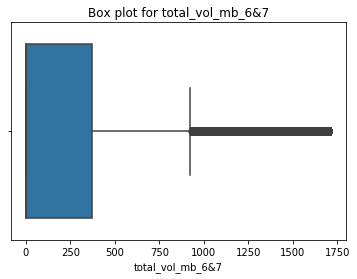

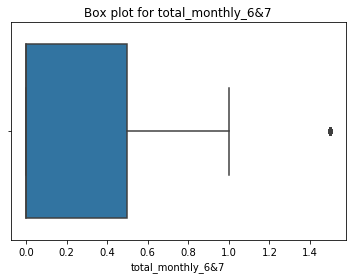

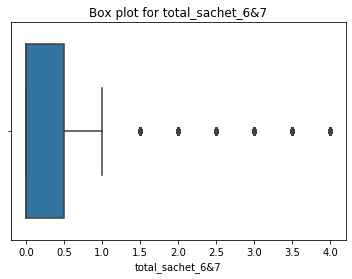

In [76]:
#Box Plot After capping
for i in num_cols:
    sns.boxplot(datafinal[i])
    plt.title('Box plot for '+i)
    plt.show()

Although, we still see outliers in the data but we will proceed with the Data Prepration step to avoid any more infomation loss due to further levels of capping

## 7. Data Preparation

### Splitting data into Test and Train

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X = datafinal.drop('target', axis=1)
X.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  vol_3g_mb_8  arpu_3g_8  arpu_2g_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8   aon  vbc_3g_8  total_rech  avg_rech_amt_8  total_rech_amt_data_8  total_vol_mb_8  total_monthly_8  total_sachet_8   arpu_6&7  onnet_mou_6&7  offnet_mou_6&7  roam_ic_mou_6&7  roam_og_mou_6&7  loc_og_t2t_mou_6&7  loc_og_t2m_mou_6&7  loc_og_t2f_mou_6&7  \
7   1258.5555        52.29        325.91         31.640          38.06             40.28            162.28             31.31              0.00        255.79             12.01             49.14              7.18         77.84          0.55          6.50          0.0          350.16             27.31            121.19             39.53        188.04             30.39           121.875             10.98       191.955          428.74           0.0        31.590         3.93                 7              1494             455                 252                0.0              0.0              0.0              0.0                 0.0         0.00         0.00       0.00        0.0             0            0             0            0   802     57.74      1185.0      220.000000                    0.0            0.00                0               0  1187.9860         56.260         510.295          24.8600           18.165              41.385             378.005             32.4425   
8    137.3620        35.08        136.48          0.000           0.00             12.49             50.54              0.00              7.15         63.04             22.58             75.69              0.00         98.28          0.00         10.23          0.0          171.56              0.31             15.48              0.00         15.79              0.10             0.650              0.00         0.750           16.54           0.0         0.000         0.00                14               120              30                  10                3.0             23.0              3.0              0.0                69.0         0.03        11.94      19.83        0.0             0            3             0            0   315     21.03       519.0        8.571429                  207.0           11.97                0               3   435.4720        382.360          87.645           0.0000            0.000             257.360              75.770              0.0000   
13   593.2600       534.24        482.46         62.795           1.44             36.01            294.46             23.51              0.49        353.99            498.23            156.94              0.00        655.18          0.55          4.78          0.0         1015.26             52.58            195.18              7.49        255.26             61.56           121.875              1.91       191.955          926.56           0.0        46.485         3.93                11               717             130                   0                3.0             23.0              3.0              0.0                69.0         0.02         0.00       0.00        0.2             0            3             0            0  2607      0.00       380.0       65.181818                  207.0            0.02                0               3   349.2585        305.075         266.295          78.9425           21.620              27.910              99.205              2.2700   
16   187.8940        70.61     

In [79]:
y = datafinal['target']
y.head()

7     1
8     0
13    0
16    0
17    0
Name: target, dtype: category
Categories (2, int64): [1 < 0]

In [80]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=100)

In [81]:
X_train.shape, X_test.shape

((22508, 108), (7503, 108))

### Feature Scaling

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
#Scaling all numeric features
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.describe()

arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8   og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8   ic_others_8  total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8   vol_2g_mb_8   vol_3g_mb_8     arpu_3g_8     arpu_2g_8  monthly_2g_8   sachet_2g_8  monthly_3g_8   sachet_3g_8           aon      vbc_3g_8    total_rech  avg_rech_amt_8  total_rech_amt_data_8  total_vol_mb_8  total_monthly_8  total_sachet_8      arpu_6&7  onnet_mou_6&7  offnet_mou_6&7  roam_ic_mou_6&7  roam_og_mou_6&7  loc_og_t2t_mou_6&7  \
count  2.250800e+04  2.250800e+04  2.250800e+04   2.250800e+04   2.250800e+04      2.250800e+04      2.250800e+04      2.250800e+04      2.250800e+04  2.250800e+04      2.250800e+04      2.250800e+04      2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04    2.250800e+04      2.250800e+04      2.250800e+04      2.250800e+04  2.250800e+04      2.250800e+04      2.250800e+04      2.250800e+04  2.250800e+04    2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04      2.250800e+04      2.250800e+04    2.250800e+04        2.250800e+04       2.250800e+04     2.250800e+04     2.250800e+04     2.250800e+04        2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04    2.250800e+04           2.250800e+04    2.250800e+04     2.250800e+04    2.250800e+04  2.250800e+04   2.250800e+04    2.250800e+04     2.250800e+04     2.250800e+04        2.250800e+04   
mean   1.358769e-16 -1.866491e-16 -2.412335e-19  -1.149106e-15   1.190234e-15     -1.716535e-16      4.706659e-17     -1.082403e-16      1.710724e-15  1.101542e-16     -4.562875e-16     -1.790030e-16      1.008094e-15 -1.879605e-16  1.128242e-15  2.940330e-16 -9.523102e-16   -1.188876e-16      8.884546e-17      7.941439e-18      2.673848e-16  9.411345e-18     -1.449288e-16     -2.496152e-16     -6.177502e-16 -1.502609e-16   -1.504434e-16 -1.520810e-16  5.522309e-16  6.279508e-16     -4.854143e-17      2.531149e-17    6.873796e-16       -1.630313e-16      -5.379153e-16     3.338882e-16    -7.579092e-16    -5.619826e-16        4.320118e-16 -3.456647e-16 -6.961337e-17  9.829676e-16  1.503665e-15 -3.109789e-16 -1.009648e-15  4.772805e-16  4.452928e-16  3.666380e-17  2.089930e-16 -2.233221e-17   -1.232723e-16           2.796077e-16    2.750993e-16    -1.963262e-16   -2.158296e-16  1.994929e-16  -2.167026e-16    1.429656e-16    -1.781003e-16    -1.112946e-15        3.290025e-17   
std    1.000022e+00  1.000022e+00  1.000022e+00   1.000022e+00   1.000022e+00      1.000022e+00      1.000022e+00      1.000022e+00      1.000022e+00  1.000022e+00      1.000022e+00      1.000022e+00      1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00    1.000022e+00      1.000022e+00      1.000022e+00      1.000022e+00  1.000022e+00      1.000022e+00      1.000022e+00      1.000022e+00  1.000022e+00    1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00      1.000022e+00      1.000022e+00    1.000022e+00        1.000022e+00       1.000022e+00     1.000022e+00     1.000022e+00     1.000022e+00        1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00    1.000022e+00           1.000022e+00    1.000022e+00     1.000022e+00    1.000022e+00  1.000022e+00   1.000022e+00    1.000022e+00     1.000022e+00     1.000022e+00        1.000022e+00   
min   -4.550235e+00 -7.635393e-01 -1.062224e+00  -3.5

## 8. Model Building & Evaluation

#### Note: To deal with Class Imbalance, we are using the inbuilt 'Weight of Class' balancing technique in sklearn. Hence, we have used the class_weight = 'balanced' parameter.

### Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
logreg = LogisticRegression(class_weight = 'balanced')

In [85]:
rfecv = RFECV(estimator=logreg, cv=4)
rfecv.fit(X_train, y_train)
rfecv.grid_scores_

array([0.66087613, 0.66434157, 0.68180203, 0.68557846, 0.69521948,
       0.72703039, 0.73631598, 0.77794562, 0.79158521, 0.79562822,
       0.80100409, 0.8014928 , 0.80677981, 0.81144482, 0.81220011,
       0.81424382, 0.81619868, 0.81570997, 0.81664297, 0.81673183,
       0.82028612, 0.81997512, 0.82073041, 0.82144127, 0.82184112,
       0.82370713, 0.8242847 , 0.82472899, 0.82806113, 0.82921628,
       0.82868313, 0.82828328, 0.82859428, 0.82788342, 0.82717256,
       0.82894971, 0.82863871, 0.82943842, 0.830949  , 0.83059357,
       0.83014928, 0.83028257, 0.83032699, 0.83006042, 0.83001599,
       0.83099342, 0.83077128, 0.83086014, 0.83103785, 0.83165985,
       0.83170428, 0.83237071, 0.83339257, 0.833437  , 0.83357029,
       0.83379243, 0.83348143, 0.83334814, 0.83365914, 0.83379243,
       0.83352586, 0.83294829, 0.83285943, 0.832815  , 0.83268171,
       0.83290386, 0.83254843, 0.83277057, 0.83245957, 0.83241514,
       0.83179314, 0.83201528, 0.83228186, 0.832504  , 0.83272

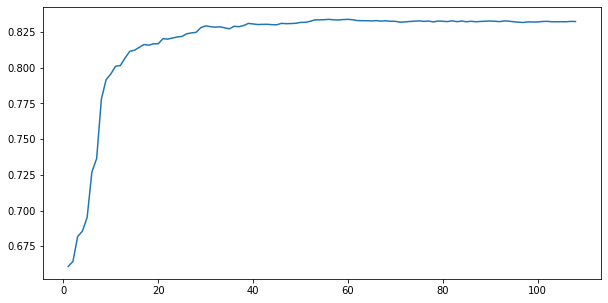

In [86]:
num_features = X_train.shape
num_features[1]
plt.figure(figsize=[10, 5])
plt.plot(range(1, num_features[1]+1), rfecv.grid_scores_)
plt.show()

The accuracy of the model starts flattening after the 18 variable model. Hence, we select 18 as the starting point.

In [87]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 18)             # running RFE with 18 variables.
rfe = rfe.fit(X_train, y_train)

In [88]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 11),
 ('onnet_mou_8', False, 4),
 ('offnet_mou_8', False, 68),
 ('roam_ic_mou_8', False, 65),
 ('roam_og_mou_8', False, 3),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 86),
 ('loc_og_t2c_mou_8', False, 66),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_8', False, 22),
 ('std_og_t2m_mou_8', False, 5),
 ('std_og_t2f_mou_8', False, 55),
 ('std_og_mou_8', True, 1),
 ('isd_og_mou_8', False, 70),
 ('spl_og_mou_8', False, 84),
 ('og_others_8', False, 78),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 52),
 ('std_ic_t2m_mou_8', False, 50),
 ('std_ic_t2f_mou_8', False, 49),
 ('std_ic_mou_8', False, 51),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 46),
 ('ic_others_8', False, 88),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 21),
 ('max_rec

In [89]:
X_train.columns[rfe.support_]

Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8', 'arpu_6&7', 'total_ic_mou_6&7', 'count_rech_2g_6&7', 'sachet_2g_6&7'], dtype='object')

In [90]:
#Checking Recall on Train set.
y_pred = rfe.predict(X_train)
print("Recall: ", metrics.recall_score(y_train,y_pred))

Recall:  0.8228896944588296


In [91]:
#Checking Recall on Test Set.
y_pred = rfe.predict(X_test)
lr_recall = metrics.recall_score(y_test,y_pred)
print("Recall: ", metrics.recall_score(y_test,y_pred))

Recall:  0.850453172205438


In [92]:
#Accuracy
lr_acc = metrics.accuracy_score(y_pred, y_test)
lr_acc

0.7446354791416767

The model provides a robust recall of 85% on the test set. However, the accuracy drops to 74%. Hence, it would be desirable to look at models which would provide similar recall with a better accuracy.

In [93]:
#Creating Scorecard for comparison.
score_card = pd.DataFrame({'Method':['Logistic Regression'],'Accuracy Score':[lr_acc],'Recall Score':[lr_recall]})
score_card

Method  Accuracy Score  Recall Score
0  Logistic Regression        0.744635      0.850453

### Decision Tree

For the business, our main focus would be to optimize the Recall/Sensitivity of the final model

In [94]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=40,stratify=y)
X_train.shape, X_test.shape

((22508, 108), (7503, 108))

In [95]:
#Checking the shape
y_train.shape, y_test.shape

((22508,), (7503,))

In [96]:
y_train.value_counts(normalize=True)

0    0.913586
1    0.086414
Name: target, dtype: float64

In [97]:
y_test.value_counts(normalize=True)

0    0.913635
1    0.086365
Name: target, dtype: float64

In [98]:
#Performing the standard scaling of Train & then Test dataset
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.describe()

arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8   og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8   ic_others_8  total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8   vol_2g_mb_8   vol_3g_mb_8     arpu_3g_8     arpu_2g_8  monthly_2g_8   sachet_2g_8  monthly_3g_8   sachet_3g_8           aon      vbc_3g_8    total_rech  avg_rech_amt_8  total_rech_amt_data_8  total_vol_mb_8  total_monthly_8  total_sachet_8      arpu_6&7  onnet_mou_6&7  offnet_mou_6&7  roam_ic_mou_6&7  roam_og_mou_6&7  loc_og_t2t_mou_6&7  \
count  2.250800e+04  2.250800e+04  2.250800e+04   2.250800e+04   2.250800e+04      2.250800e+04      2.250800e+04      2.250800e+04      2.250800e+04  2.250800e+04      2.250800e+04      2.250800e+04      2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04    2.250800e+04      2.250800e+04      2.250800e+04      2.250800e+04  2.250800e+04      2.250800e+04      2.250800e+04      2.250800e+04  2.250800e+04    2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04      2.250800e+04      2.250800e+04    2.250800e+04        2.250800e+04       2.250800e+04     2.250800e+04     2.250800e+04     2.250800e+04        2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04  2.250800e+04    2.250800e+04           2.250800e+04    2.250800e+04     2.250800e+04    2.250800e+04  2.250800e+04   2.250800e+04    2.250800e+04     2.250800e+04     2.250800e+04        2.250800e+04   
mean  -2.319196e-16 -8.638904e-17  1.857877e-16  -4.843242e-16  -6.965826e-16      1.656213e-16     -3.492260e-18     -4.027493e-16     -3.529797e-16 -8.734596e-17      3.507255e-16     -3.090009e-16      9.043720e-16 -9.714945e-17  3.877395e-16  1.611964e-16  3.063225e-16    1.875918e-17     -3.120714e-17     -8.428777e-17      6.990587e-16  1.514250e-16     -3.183678e-16     -5.738306e-17     -1.057733e-15  1.942594e-16   -7.409954e-17 -1.913443e-16  1.004927e-15  2.184636e-17      2.211173e-16     -1.618302e-16   -1.964557e-16        4.855228e-16      -1.017491e-16     3.132774e-16     8.356761e-16    -5.130318e-16        3.452701e-16  6.592627e-16  4.155937e-16 -7.260793e-16  1.097842e-16  1.253287e-15 -5.642713e-16 -9.207876e-16 -2.716441e-16  2.767172e-17  6.720085e-16  1.135774e-16    1.359324e-16          -4.487653e-17   -1.449584e-16     1.250308e-16   -7.716514e-16  3.363125e-16   2.794795e-17    7.924976e-17    -1.018453e-16     6.291987e-17        5.698599e-17   
std    1.000022e+00  1.000022e+00  1.000022e+00   1.000022e+00   1.000022e+00      1.000022e+00      1.000022e+00      1.000022e+00      1.000022e+00  1.000022e+00      1.000022e+00      1.000022e+00      1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00    1.000022e+00      1.000022e+00      1.000022e+00      1.000022e+00  1.000022e+00      1.000022e+00      1.000022e+00      1.000022e+00  1.000022e+00    1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00      1.000022e+00      1.000022e+00    1.000022e+00        1.000022e+00       1.000022e+00     1.000022e+00     1.000022e+00     1.000022e+00        1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00    1.000022e+00           1.000022e+00    1.000022e+00     1.000022e+00    1.000022e+00  1.000022e+00   1.000022e+00    1.000022e+00     1.000022e+00     1.000022e+00        1.000022e+00   
min   -1.736286e+00 -7.613881e-01 -1.065119e+00  -3.6

In [99]:
#Sacling the tets dataset
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
#building the 1st base decision tree model
dt_base = DecisionTreeClassifier(random_state=40, max_depth=5, class_weight='balanced')

In [102]:
#fitting the base DT model
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=40)

In [103]:
#predicting on train & test dataset
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

In [105]:
#Checking Accuracy on train dataset
accuracy_score(y_train, y_train_pred)

0.8282832770570464

In [106]:
#Checking Recall on train dataset
metrics.recall_score(y_test, y_test_pred)

0.8611111111111112

In [107]:
#Checking the generalized train Accuracy of the model through cross validation technique
cross_val_score(dt_base, X_train, y_train, cv=5, n_jobs=-1).mean()

0.8366801651560525

In [108]:
#Checking the generalized train Recall of the model through cross validation technique
cross_val_score(dt_base, X_train, y_train, cv=5, scoring="recall", n_jobs=-1).mean()

0.8308483290488432

In [109]:
#Checking the Confusion Matrix
confusion_matrix(y_train, y_train_pred)

array([[16911,  3652],
       [  213,  1732]], dtype=int64)

In [110]:
from sklearn.metrics import plot_roc_curve

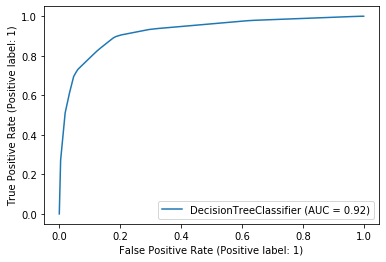

In [111]:
#Plotting the AUC_ROC curve
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

In [112]:
#Checking the Accuracy score on test dataset
dt_acc = accuracy_score(y_test, y_test_pred)
dt_acc

0.8228708516593363

In [113]:
#Checking the Recall Score on test dataset
dt_rc = metrics.recall_score(y_test, y_test_pred)
dt_rc

0.8611111111111112

In [114]:
#creating & updating the score card for the models
tempscore = pd.DataFrame({'Method':['Decision Tree'],'Accuracy Score':[dt_acc],'Recall Score':[dt_rc]})
score_card = pd.concat([score_card, tempscore])
score_card

Method  Accuracy Score  Recall Score
0  Logistic Regression        0.744635      0.850453
0        Decision Tree        0.822871      0.861111

#### Although we have got a decent model with our base Decision Tree in terms of Accuracy & Recall(which is our focus to optimise for the business), lets also build the Decision Tree with Hyper-parameter tuning.

### Decision Tree (with Hyper-parameter tuning)

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
dt2 = DecisionTreeClassifier(random_state=40, class_weight='balanced')

In [117]:
#creating a list of each of the hyper parameters
params = {
    "max_depth": [2,5,6,7,8,9,10,15],
    "min_samples_leaf": [2,3,4,5,10,15,30,50,70]
}

In [118]:
#initiating the GridSearchCV tuning
grid_search = GridSearchCV(estimator=dt2, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring="recall")

In [119]:
%%time
#fitting the model with GSCV
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
Wall time: 1min 35s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=40),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 6, 7, 8, 9, 10, 15],
                         'min_samples_leaf': [2, 3, 4, 5, 10, 15, 30, 50, 70]},
             scoring='recall', verbose=1)

In [120]:
#getting the best fit estimator DT model
dt2_best = grid_search.best_estimator_
dt2_best

DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=2,
                       random_state=40)

In [121]:
#predicting on train & test dataset
y_train_pred = dt2_best.predict(X_train)
y_test_pred = dt2_best.predict(X_test)

In [122]:
#Checking Accuracy on train dataset
accuracy_score(y_train, y_train_pred)

0.7769237604407322

In [123]:
#Checking Recall on train dataset
metrics.recall_score(y_test, y_test_pred)

0.8317901234567902

In [124]:
#Checking the generalized train Accuracy of the model through cross validation technique
cross_val_score(dt2_best, X_train, y_train, cv=5, n_jobs=-1).mean()

0.7829211061345666

In [125]:
#Checking the generalized train Recall of the model through cross validation technique
cross_val_score(dt2_best, X_train, y_train, cv=5, scoring="recall", n_jobs=-1).mean()

0.8221079691516711

In [126]:
#Checking the Confusion Matrix
confusion_matrix(y_train, y_train_pred)

array([[15861,  4702],
       [  319,  1626]], dtype=int64)

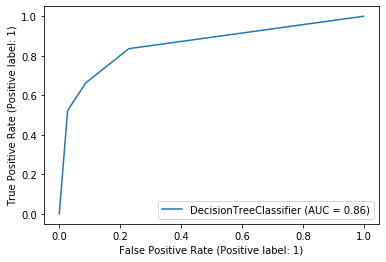

In [127]:
#plotting the AUC_ROC curve
plot_roc_curve(dt2_best, X_train, y_train, drop_intermediate=False)
plt.show()

In [128]:
#Checking the accuracy on test dataset
dth_acc = accuracy_score(y_test, y_test_pred)
dth_acc

0.7763561242169799

In [129]:
#Checking the Recall Score on test dataset
dth_rc = metrics.recall_score(y_test, y_test_pred)
dth_rc

0.8317901234567902

In [130]:
#updating the score card of the models built so far...
tempscore = pd.DataFrame({'Method':['Decision Tree (with Hyper-parameter tunning)'],'Accuracy Score':[dth_acc],'Recall Score':[dth_rc]})
score_card = pd.concat([score_card, tempscore])
score_card

Method  Accuracy Score  Recall Score
0                           Logistic Regression        0.744635      0.850453
0                                 Decision Tree        0.822871      0.861111
0  Decision Tree (with Hyper-parameter tunning)        0.776356      0.831790

### Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rf = RandomForestClassifier(n_estimators=50, max_depth=5, max_features=80, random_state=40, oob_score=True, class_weight='balanced')

In [133]:
%%time
#fitting the model with RF
rf.fit(X_train, y_train)

Wall time: 20.7 s


RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=80,
                       n_estimators=50, oob_score=True, random_state=40)

In [134]:
#getting the OOB score of this RF model
rf.oob_score_

0.8878176648302826

In [135]:
#predicting on train & test dataset
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [136]:
#Checking Accuracy on train dataset
accuracy_score(y_train, y_train_pred)

0.8969699662342279

In [137]:
#Checking Recall on train dataset
metrics.recall_score(y_test, y_test_pred)

0.7870370370370371

In [138]:
#Checking the generalized train Accuracy of the model through cross validation technique
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1).mean()

0.8943490715474551

In [139]:
#Checking the generalized train Recall of the model through cross validation technique
cross_val_score(rf, X_train, y_train, cv=5, scoring="recall", n_jobs=-1).mean()

0.7938303341902313

In [140]:
#Checking the Confusion Matrix
confusion_matrix(y_train, y_train_pred)

array([[18547,  2016],
       [  303,  1642]], dtype=int64)

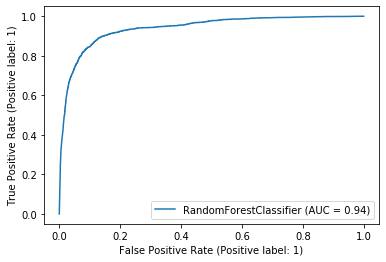

In [141]:
#Plotting the AUC_ROC curve
plot_roc_curve(rf, X_train, y_train, drop_intermediate=False)
plt.show()

In [142]:
#Checking the accuracy on test dataset
rf_acc = accuracy_score(y_test, y_test_pred)
rf_acc

0.8879115020658404

In [143]:
#Checking the Recall Score on test dataset
rf_rc = metrics.recall_score(y_test, y_test_pred)
rf_rc

0.7870370370370371

In [144]:
#updating the score card of the models built so far...
tempscore = pd.DataFrame({'Method':['Random Forest'],'Accuracy Score':[rf_acc],'Recall Score':[rf_rc]})
score_card = pd.concat([score_card, tempscore])
score_card

Method  Accuracy Score  Recall Score
0                           Logistic Regression        0.744635      0.850453
0                                 Decision Tree        0.822871      0.861111
0  Decision Tree (with Hyper-parameter tunning)        0.776356      0.831790
0                                 Random Forest        0.887912      0.787037

### Random Forest (with Hyper-parameter tuning)

#### Hyper-parameter tuning using GridSearchCV

#### Important Consideration:
1. Kindly note that the RF hyper-parameter tuning with GridSearchCV was taking hours of time & consuming a lot of system resources while fitting the model. 
2. Also, for a large dataset (with higher numbers of features) it is recommended to not use GridSearchCV & instead apply RandomizedSearchCV for hyper-paremeter tuning.

#### Therefore, we have made the entire code(below) of this approach as non executable  text & moved towards the next approach.

#### Hyper-parameter tuning using RandomizedSearchCV

In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [146]:
rf2 = RandomForestClassifier(random_state=40, n_jobs=-1, class_weight='balanced')

In [147]:
#Creating a list of each of the hyper parameters
hyper_params = {'max_depth': range(3, 20),
                'max_features': range(30, 100),
                'min_samples_leaf': range(100, 500, 30),
                'n_estimators': range(5, 111, 15)}

In [148]:
#Initiating the RandomizedSearchCV tuning
model_rcv = RandomizedSearchCV(estimator=rf2, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=5,
                              n_jobs=-1,
                              n_iter=70,
                              scoring="recall")

In [149]:
%%time
#fitting the model with RSCV
model_rcv.fit(X_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
Wall time: 30min 55s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=40),
                   n_iter=70, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': range(30, 100),
                                        'min_samples_leaf': range(100, 500, 30),
                                        'n_estimators': range(5, 111, 15)},
                   scoring='recall', verbose=1)

In [150]:
#getting the best fit estimator RF model
rf_best2 = model_rcv.best_estimator_
rf_best2

RandomForestClassifier(class_weight='balanced', max_depth=19, max_features=70,
                       min_samples_leaf=310, n_estimators=50, n_jobs=-1,
                       random_state=40)

In [151]:
#predicting on train & test dataset
y_train_pred = rf_best2.predict(X_train)
y_test_pred = rf_best2.predict(X_test)

In [152]:
#Checking Accuracy on train dataset
accuracy_score(y_train, y_train_pred)

0.8711124933357028

In [153]:
#Checking Recall on train dataset
metrics.recall_score(y_test, y_test_pred)

0.8148148148148148

In [154]:
#Checking the generalized train Accuracy of the model through cross validation technique
cross_val_score(rf_best2, X_train, y_train, cv=5, n_jobs=-1).mean()

0.8602722273770842

In [155]:
#Checking the generalized train Recall of the model through cross validation technique
cross_val_score(rf_best2, X_train, y_train, cv=5, scoring="recall", n_jobs=-1).mean()

0.8323907455012854

In [156]:
#Checking the Confusion Matrix
confusion_matrix(y_train, y_train_pred)

array([[17956,  2607],
       [  294,  1651]], dtype=int64)

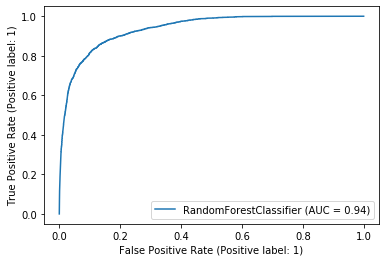

In [157]:
#plotting the AUC_ROC curve
plot_roc_curve(rf_best2, X_train, y_train, drop_intermediate=False)
plt.show()

In [158]:
#Checking the accuracy on test dataset
rfhrs_acc = accuracy_score(y_test, y_test_pred)
rfhrs_acc

0.8660535785685726

In [159]:
#Checking the Recall Score on test dataset
rfhrs_rc = metrics.recall_score(y_test, y_test_pred)
rfhrs_rc

0.8148148148148148

In [160]:
#updating the score card of the models built so far...
tempscore = pd.DataFrame({'Method':['Random Forest (with Hyper-parameter tunning - RSCV)'],'Accuracy Score':[rfhrs_acc],'Recall Score':[rfhrs_rc]})
score_card = pd.concat([score_card, tempscore])
score_card

Method  Accuracy Score  Recall Score
0                                Logistic Regression        0.744635      0.850453
0                                      Decision Tree        0.822871      0.861111
0       Decision Tree (with Hyper-parameter tunning)        0.776356      0.831790
0                                      Random Forest        0.887912      0.787037
0  Random Forest (with Hyper-parameter tunning - ...        0.866054      0.814815

### Final Model Evaluation Score Card

In [224]:
score_card

Accuracy Score  Recall Score
Method                                                                          
Logistic Regression                                       0.744635      0.850453
Decision Tree                                             0.822871      0.861111
Decision Tree (with Hyper-parameter tunning)              0.776356      0.831790
Random Forest                                             0.887912      0.787037
Random Forest (with Hyper-parameter tunning - R...        0.866054      0.814815

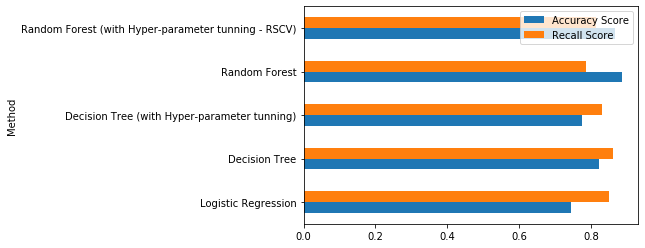

In [226]:
score_card.set_index('Method',inplace=True)
score_card.plot.barh()
plt.show()

#### Based on the above score card of all the models, we can see that the Decision Tree has performed the best in terms of Recall & Accuracy. Therefore, we will proceed with feature importance from this model

## 9. Importance Features

In [227]:
dt_base.feature_importances_

array([0.00617783, 0.00230529, 0.        , 0.        , 0.12459577,
       0.        , 0.        , 0.        , 0.        , 0.03273038,
       0.        , 0.0014032 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01217925,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.64269589, 0.00219874, 0.        , 0.        ,
       0.        , 0.04781137, 0.        , 0.04263091, 0.        ,
       0.00775773, 0.        , 0.        , 0.00818442, 0.        ,
       0.        , 0.        , 0.00173438, 0.        , 0.        ,
       0.        , 0.        , 0.00822648, 0.        , 0.        ,
       0.        , 0.00762742, 0.00971047, 0.        , 0.        ,
       0.00218102, 0.        , 0.        , 0.        , 0.01458107,
       0.        , 0.        , 0.        , 0.        , 0.00413288,
       0.        , 0.        , 0.        , 0.00352425, 0.00116679,
       0.        , 0.        , 0.        , 0.        , 0.     

In [228]:
feat_imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": dt_base.feature_importances_
})

In [229]:
top_feat_sort = feat_imp.sort_values(by="Importance", ascending=False)
top_feat_sort

Feature  Importance
26            total_ic_mou_8    0.642696
4              roam_og_mou_8    0.124596
31          total_rech_amt_8    0.047811
33        last_day_rch_amt_8    0.042631
9               loc_og_mou_8    0.032730
59           roam_og_mou_6&7    0.014581
19          loc_ic_t2m_mou_8    0.012179
85        total_rech_num_6&7    0.010370
52            total_vol_mb_8    0.009710
47                       aon    0.008226
38        av_rech_amt_data_8    0.008184
35           max_rech_data_8    0.007758
51     total_rech_amt_data_8    0.007627
0                     arpu_8    0.006178
87          max_rech_amt_6&7    0.006074
64            loc_og_mou_6&7    0.004133
68            std_og_mou_6&7    0.003524
1                onnet_mou_8    0.002305
27              spl_ic_mou_8    0.002199
55                  arpu_6&7    0.002181
42                 arpu_2g_8    0.001734
11          std_og_t2m_mou_8    0.001403
69            isd_og_mou_6&7    0.001167
71             og_others_6&7    0.000000
76            loc_ic_mou_6&7    0.000000
75        loc_ic_t2f_mou_6&7    0.000000
74        loc_ic_t2m_mou_6&7    0.000000
73        loc_ic_t2t_mou_6&7    0.000000
103         avg_rech_amt_6&7    0.000000
72          total_og_mou_6&7    0.000000
104  total_rech_amt_data_6&7    0.000000
70            spl_og_mou_6&7    0.000000
78        std_ic_t2m_mou_6&7    0.000000
105         total_vol_mb_6&7    0.000000
67        std_og_t2f_mou_6&7    0.000000
66        std_og_t2m_mou_6&7    0.000000
106        total_monthly_6&7    0.000000
65        std_og_t2t_mou_6&7    0.000000
77        std_ic_t2t_mou_6&7    0.000000
97               arpu_2g_6&7    0.000000
79        std_ic_t2f_mou_6&7    0.000000
96               arpu_3g_6&7    0.000000
95             vol_3g_mb_6&7    0.000000
94             vol_2g_mb_6&7    0.000000
93      av_rech_amt_data_6&7    0.000000
98            monthly_2g_6&7    0.000000
92         count_rech_3g_6&7    0.000000
91         count_rech_2g_6&7    0.000000
90         max_rech_data_6&7    0.000000
89       total_rech_data_6&7    0.000000
88      last_day_rch_amt_6&7    0.000000
99             sachet_2g_6&7    0.000000
86        total_rech_amt_6&7    0.000000
84             ic_others_6&7    0.000000
63        loc_og_t2c_mou_6&7    0.000000
83            isd_ic_mou_6&7    0.000000
100           monthly_3g_6&7    0.000000
82            spl_ic_mou_6&7    0.000000
101            sachet_3g_6&7    0.000000
81          total_ic_mou_6&7    0.000000
80            std_ic_mou_6&7    0.000000
102               vbc_3g_6&7    0.000000
54            total_sachet_8    0.000000
62        loc_og_t2f_mou_6&7    0.000000
28              isd_ic_mou_8    0.000000
24          std_ic_t2f_mou_8    0.000000
23          std_ic_t2m_mou_8    0.000000
22          std_ic_t2t_mou_8    0.000000
21              loc_ic_mou_8    0.000000
20          loc_ic_t2f_mou_8    0.000000
18          loc_ic_t2t_mou_8    0.000000
17            total_og_mou_8    0.000000
16               og_others_8    0.000000
15              spl_og_mou_8    0.000000
14              isd_og_mou_8    0.000000
13              std_og_mou_8    0.000000
12          std_og_t2f_mou_8    0.000000
10          std_og_t2t_mou_8    0.000000
8           loc_og_t2c_mou_8    0.000000
7           loc_og_t2f_mou_8    0.000000
6           loc_og_t2m_mou_8    0.000000
5           loc_og_t2t_mou_8    0.000000
3              roam_ic_mou_8    0.000000
2               offnet_mou_8    0.000000
25              std_ic_mou_8    0.000000
29               ic_others_8    0.000000
61        loc_og_t2m_mou_6&7    0.000000
30          total_rech_num_8    0.000000
60        loc_og_t2t_mou_6&7    0.000000
58           roam_ic_mou_6&7    0.000000
57            offnet_mou_6&7    0.000000
56             onnet_mou_6&7    0.000000
53           total_monthly_8    0.000000
50            avg_rech_amt_8    0.000000
49                total_rech    0.000000
48                  vbc_3g_8    0.000000
46               sachet_3g_8    0.000000
45 

In [230]:
top_feat_sort.reset_index()

index                  Feature  Importance
0       26           total_ic_mou_8    0.642696
1        4            roam_og_mou_8    0.124596
2       31         total_rech_amt_8    0.047811
3       33       last_day_rch_amt_8    0.042631
4        9             loc_og_mou_8    0.032730
5       59          roam_og_mou_6&7    0.014581
6       19         loc_ic_t2m_mou_8    0.012179
7       85       total_rech_num_6&7    0.010370
8       52           total_vol_mb_8    0.009710
9       47                      aon    0.008226
10      38       av_rech_amt_data_8    0.008184
11      35          max_rech_data_8    0.007758
12      51    total_rech_amt_data_8    0.007627
13       0                   arpu_8    0.006178
14      87         max_rech_amt_6&7    0.006074
15      64           loc_og_mou_6&7    0.004133
16      68           std_og_mou_6&7    0.003524
17       1              onnet_mou_8    0.002305
18      27             spl_ic_mou_8    0.002199
19      55                 arpu_6&7    0.002181
20      42                arpu_2g_8    0.001734
21      11         std_og_t2m_mou_8    0.001403
22      69           isd_og_mou_6&7    0.001167
23      71            og_others_6&7    0.000000
24      76           loc_ic_mou_6&7    0.000000
25      75       loc_ic_t2f_mou_6&7    0.000000
26      74       loc_ic_t2m_mou_6&7    0.000000
27      73       loc_ic_t2t_mou_6&7    0.000000
28     103         avg_rech_amt_6&7    0.000000
29      72         total_og_mou_6&7    0.000000
30     104  total_rech_amt_data_6&7    0.000000
31      70           spl_og_mou_6&7    0.000000
32      78       std_ic_t2m_mou_6&7    0.000000
33     105         total_vol_mb_6&7    0.000000
34      67       std_og_t2f_mou_6&7    0.000000
35      66       std_og_t2m_mou_6&7    0.000000
36     106        total_monthly_6&7    0.000000
37      65       std_og_t2t_mou_6&7    0.000000
38      77       std_ic_t2t_mou_6&7    0.000000
39      97              arpu_2g_6&7    0.000000
40      79       std_ic_t2f_mou_6&7    0.000000
41      96              arpu_3g_6&7    0.000000
42      95            vol_3g_mb_6&7    0.000000
43      94            vol_2g_mb_6&7    0.000000
44      93     av_rech_amt_data_6&7    0.000000
45      98           monthly_2g_6&7    0.000000
46      92        count_rech_3g_6&7    0.000000
47      91        count_rech_2g_6&7    0.000000
48      90        max_rech_data_6&7    0.000000
49      89      total_rech_data_6&7    0.000000
50      88     last_day_rch_amt_6&7    0.000000
51      99            sachet_2g_6&7    0.000000
52      86       total_rech_amt_6&7    0.000000
53      84            ic_others_6&7    0.000000
54      63       loc_og_t2c_mou_6&7    0.000000
55      83           isd_ic_mou_6&7    0.000000
56     100           monthly_3g_6&7    0.000000
57      82           spl_ic_mou_6&7    0.000000
58     101            sachet_3g_6&7    0.000000
59      81         total_ic_mou_6&7    0.000000
60      80           std_ic_mou_6&7    0.000000
61     102               vbc_3g_6&7    0.000000
62      54           total_sachet_8    0.000000
63      62       loc_og_t2f_mou_6&7    0.000000
64      28             isd_ic_mou_8    0.000000
65      24         std_ic_t2f_mou_8    0.000000
66      23         std_ic_t2m_mou_8    0.000000
67      22         std_ic_t2t_mou_8    0.000000
68      21             loc_ic_mou_8    0.000000
69      20         loc_ic_t2f_mou_8    0.000000
70      18         loc_ic_t2t_mou_8    0.000000
71      17           total_og_mou_8    0.000000
72      16              og_others_8    0.000000
73      15             spl_og_mou_8    0.000000
74      14             isd_og_mou_8    0.000000
75      13             std_og_mou_8    0.000000
76      12         std_og_t2f_mou_8    0.000000
77      10         std_og_t2t_mou_8    0.000000
78       8         loc_og_t2c_mou_8    0.000000
79       7         loc_og_t2f_mou_8    0.000000
80       6         loc_og_t2m_mou_8    0.000000
81       5         loc_og_t2t_mou_8    0.000000
82       3           

In [231]:
#Getting the top10 features
top_feat = list(top_feat_sort['Feature'][0:10])
top_feat

['total_ic_mou_8',
 'roam_og_mou_8',
 'total_rech_amt_8',
 'last_day_rch_amt_8',
 'loc_og_mou_8',
 'roam_og_mou_6&7',
 'loc_ic_t2m_mou_8',
 'total_rech_num_6&7',
 'total_vol_mb_8',
 'aon']

#### Below are the top 10 Important Features which are the strong indicator of Customer Churn for the Business:
1. total_ic_mou_8
2. roam_og_mou_8
3. total_rech_amt_8
4. last_day_rch_amt_8
5. loc_og_mou_8
6. roam_og_mou_6&7
7. loc_ic_t2m_mou_8
8. total_rech_num_6&7
9. total_vol_mb_8
10. aon

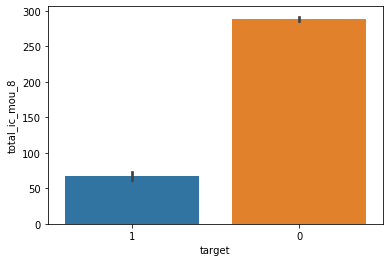

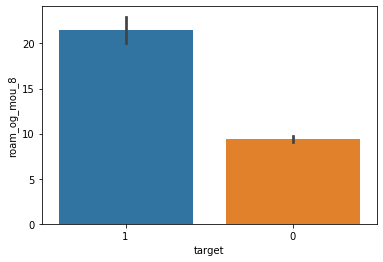

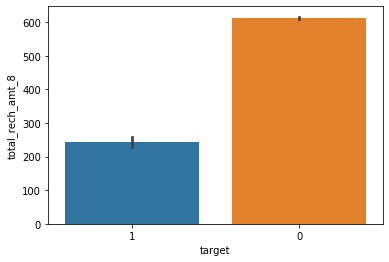

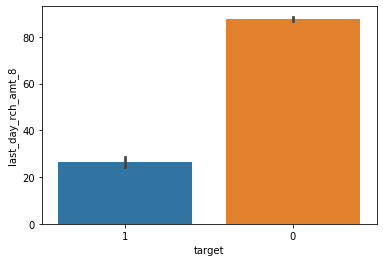

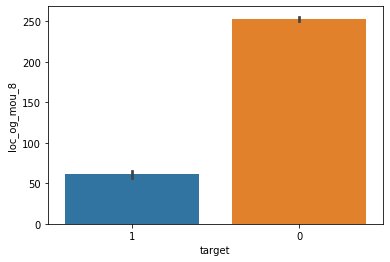

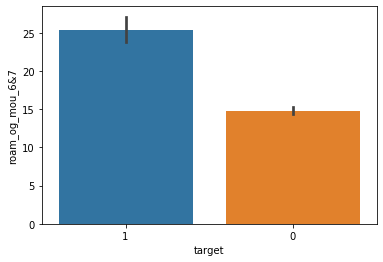

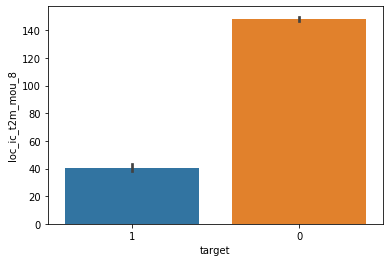

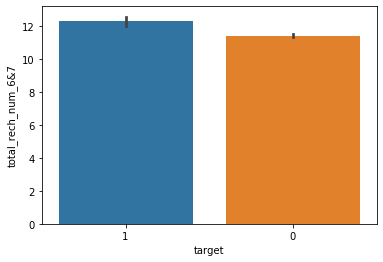

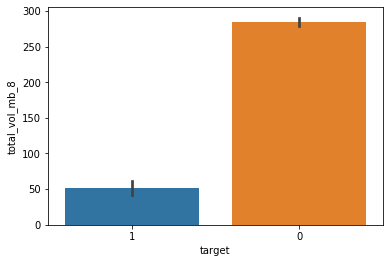

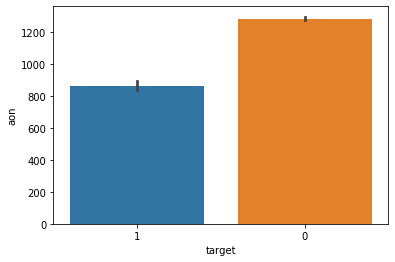

In [232]:
#Analysing the top features by churner vs. non-churners. 
#This would help in deriving the business insights & recommendations
for k in top_feat:
    sns.barplot(x='target', y=k, data=datafinal)
    plt.show()

Based on the Decision Tree model, we derived the most important features affecting churn. Plotting these features by target variable, we get the following insights:

1. Churners have lower average incoming minutes. However, they have higher roaming outgoing units. This indicates that the people who churned are people who have travelled/relocated and hence have a higher roaming usage.

2. Total Recharge amount in 8th month and total data consumed in 8th month is also low. 

3. Mean Age on the network for churners is ~850 days while for non churners is ~1300 days.

## 10. Business Insights & Recommendations

1. Since there is a clear indication that churners have a higher roaming usage, it is important to identify such users and identify the reason for high roaming. If the user has relocated, then the strategy would be to approach the user with a plan in the new circle so that the customer is not lost to a different network.

2. The data usage for the churners is low. Hence, they could be provided with a data friendly plan which encourages them to utilize data calling and hence remove the need for high roaming charges.

3. The mean AON of Churners is 800 days. Hence, for customers identified by the model whose AON is close to this range, a long duration discounted plan can be offered to ensure that they cross the threshold of 800 days and get into a higher AON bracket.

#### Thank You!